<a href="https://colab.research.google.com/github/Najdawiali/Arabot-projects/blob/main/WDI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

:
**In this dataset, we aim to predict the country name based on the available features. Specifically, we have extracted *the educational columns along with the time column*. These features will be used as input to build a model that can predict the corresponding country for each record.**


In [2]:
pip install kaggle

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)

In [5]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [6]:
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d parsabahramsari/wdi-education-health-and-employment-2011-2021

Dataset URL: https://www.kaggle.com/datasets/parsabahramsari/wdi-education-health-and-employment-2011-2021
License(s): world-bank


In [ ]:
# URL on Kaggle: https://www.kaggle.com/datasets/parsabahramsari/wdi-education-health-and-employment-2011-2021

In [8]:
!unzip wdi-education-health-and-employment-2011-2021.zip

Archive:  wdi-education-health-and-employment-2011-2021.zip
  inflating: WDI_Indicators_MainData.csv  
  inflating: WDI_Indicators_Metadata.xlsx  


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df_csv = pd.read_csv('WDI_Indicators_MainData.csv')
df_xlsx = pd.read_excel('WDI_Indicators_Metadata.xlsx')

In [11]:
df_csv.head()

,Time,Time Code,Country Name,Country Code,"Current education expenditure, primary (% of total expenditure in primary public institutions) [SE.XPD.CPRM.ZS]","Current education expenditure, secondary (% of total expenditure in secondary public institutions) [SE.XPD.CSEC.ZS]","Current education expenditure, tertiary (% of total expenditure in tertiary public institutions) [SE.XPD.CTER.ZS]","Current education expenditure, total (% of total expenditure in public institutions) [SE.XPD.CTOT.ZS]",Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS],Domestic general government health expenditure (% of GDP) [SH.XPD.GHED.GD.ZS],...,"Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]","Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate) [SL.UEM.1524.FE.ZS]","Unemployment, youth male (% of male labor force ages 15-24) (modeled ILO estimate) [SL.UEM.1524.MA.ZS]","Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate) [SL.UEM.1524.ZS]","Vulnerable employment, female (% of female employment) (modeled ILO estimate) [SL.EMP.VULN.FE.ZS]","Vulnerable employment, male (% of male employment) (modeled ILO estimate) [SL.EMP.VULN.MA.ZS]","Vulnerable employment, total (% of total employment) (modeled ILO estimate) [SL.EMP.VULN.ZS]","Wage and salaried workers, female (% of female employment) (modeled ILO estimate) [SL.EMP.WORK.FE.ZS]","Wage and salaried workers, male (% of male employment) (modeled ILO estimate) [SL.EMP.WORK.MA.ZS]","Wage and salaried workers, total (% of total employment) (modeled ILO estimate) [SL.EMP.WORK.ZS]"
0,2011,YR2011,Australia,AUS,NaN,NaN,NaN,NaN,8.537450,6.254561,...,5.083,10.780,11.921,11.370,7.235643,11.063700,9.325963,88.887973,82.113213,85.188598
1,2011,YR2011,Austria,AUT,98.021446,98.075523,92.646141,95.928642,10.030000,7.290000,...,4.637,9.261,9.095,9.173,9.541601,13.516962,11.665963,84.826191,79.864144,82.174537
2,2011,YR2011,Belgium,BEL,NaN,NaN,96.957092,96.381668,10.363379,7.895000,...,7.140,18.738,18.712,18.724,9.014035,12.569989,10.958520,89.264094,82.743616,85.698534
3,2011,YR2011,Canada,CAN,NaN,NaN,85.195671,89.551270,10.379509,7.289382,...,7.637,12.038,15.715,13.915,8.629436,12.284332,10.557431,88.673547,81.064832,84.659885
4,2011,YR2011,Denmark,DNK,94.645523,93.561073,98.103500,96.333221,10.410000,8.740000,...,7.769,14.381,18.144,16.306,4.440911,7.642493,6.128961,94.112424,88.018992,90.899592


In [12]:
df_csv.shape

(209, 95)

In [13]:
df_csv.describe()

,Time,"Current education expenditure, primary (% of total expenditure in primary public institutions) [SE.XPD.CPRM.ZS]","Current education expenditure, secondary (% of total expenditure in secondary public institutions) [SE.XPD.CSEC.ZS]","Current education expenditure, tertiary (% of total expenditure in tertiary public institutions) [SE.XPD.CTER.ZS]","Current education expenditure, total (% of total expenditure in public institutions) [SE.XPD.CTOT.ZS]",Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS],Domestic general government health expenditure (% of GDP) [SH.XPD.GHED.GD.ZS],"Educational attainment, at least Bachelor's or equivalent, population 25+, female (%) (cumulative) [SE.TER.CUAT.BA.FE.ZS]","Educational attainment, at least Bachelor's or equivalent, population 25+, male (%) (cumulative) [SE.TER.CUAT.BA.MA.ZS]","Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative) [SE.TER.CUAT.BA.ZS]",...,"Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]","Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate) [SL.UEM.1524.FE.ZS]","Unemployment, youth male (% of male labor force ages 15-24) (modeled ILO estimate) [SL.UEM.1524.MA.ZS]","Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate) [SL.UEM.1524.ZS]","Vulnerable employment, female (% of female employment) (modeled ILO estimate) [SL.EMP.VULN.FE.ZS]","Vulnerable employment, male (% of male employment) (modeled ILO estimate) [SL.EMP.VULN.MA.ZS]","Vulnerable employment, total (% of total employment) (modeled ILO estimate) [SL.EMP.VULN.ZS]","Wage and salaried workers, female (% of female employment) (modeled ILO estimate) [SL.EMP.WORK.FE.ZS]","Wage and salaried workers, male (% of male employment) (modeled ILO estimate) [SL.EMP.WORK.MA.ZS]","Wage and salaried workers, total (% of total employment) (modeled ILO estimate) [SL.EMP.WORK.ZS]"
count,209.00000,160.000000,155.000000,155.000000,164.000000,209.000000,209.000000,181.000000,181.000000,182.000000,...,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,2016.00000,91.038883,92.163499,90.938089,91.710226,10.224090,7.321458,24.489600,24.446647,24.503965,...,6.619746,15.091091,16.073507,15.513435,7.869830,10.876624,9.475974,89.892182,83.842524,86.609187
std,3.16987,5.105092,4.406583,4.241498,3.991709,2.360894,1.913369,11.694871,12.018839,11.442790,...,3.920827,10.148095,9.892808,9.961708,4.172952,4.716494,4.385335,4.875040,5.910130,5.362777
min,2011.00000,69.931122,77.698563,70.385498,73.767067,3.335964,2.113965,0.262423,0.282064,0.271797,...,1.640000,3.182000,4.130000,3.668000,0.221089,0.313090,0.296355,73.044964,70.327326,71.601655
25%,2013.00000,87.947254,89.071793,88.795101,89.509956,9.380000,6.650000,18.829885,19.000000,19.868821,...,4.296000,8.757000,9.359000,8.743000,4.489211,8.057614,6.498467,87.711808,81.052217,84.298487
50%,2016.00000,91.136391,92.295937,90.971687,92.420471,10.379509,7.830000,26.912407,26.130039,27.828066,...,5.674000,11.241000,12.834000,12.147000,7.813703,10.971947,9.591485,90.099424,82.741007,86.156497
75%,2019.00000,94.732161,96.332344,93.670300,94.663853,10.970000,8.630000,32.669998,32.310001,31.912340,...,7.830000,18.546000,20.763000,19.934000,9.430590,13.516962,11.580701,93.954204,87.977852,90.076253
max,2021.00000,99.483620,99.503937,98.103500,97.966171,18.756220,10.692574,48.680000,48.639999,47.290001,...,26.094000,54.565000,56.204000,55.444000,23.795179,21.190954,22.220932,98.749044,96.776959,97.149776


In [14]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 95 columns):
 #   Column                                                                                                                                        Non-Null Count  Dtype  
---  ------                                                                                                                                        --------------  -----  
 0   Time                                                                                                                                          209 non-null    int64  
 1   Time Code                                                                                                                                     209 non-null    object 
 2   Country Name                                                                                                                                  209 non-null    object 
 3   Country Code                       

In [15]:
df_Educational = df_csv.iloc[:, 10:34]#extract only educational columns


In [16]:
df_Educational.columns

Index(['Educational attainment, at least Bachelor's or equivalent, population 25+, female (%) (cumulative) [SE.TER.CUAT.BA.FE.ZS]',
       'Educational attainment, at least Bachelor's or equivalent, population 25+, male (%) (cumulative) [SE.TER.CUAT.BA.MA.ZS]',
       'Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative) [SE.TER.CUAT.BA.ZS]',
       'Educational attainment, at least completed lower secondary, population 25+, female (%) (cumulative) [SE.SEC.CUAT.LO.FE.ZS]',
       'Educational attainment, at least completed lower secondary, population 25+, male (%) (cumulative) [SE.SEC.CUAT.LO.MA.ZS]',
       'Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative) [SE.SEC.CUAT.LO.ZS]',
       'Educational attainment, at least completed post-secondary, population 25+, female (%) (cumulative) [SE.SEC.CUAT.PO.FE.ZS]',
       'Educational attainment, at least completed post-secondary, population 25+, ma

In [17]:
#rename them to be more readable

In [18]:
df_Educational.columns = ["Bachelor's or equivalent (female)","Bachelor's or equivalent (male)","Bachelor's or equivalent (total)","lower secondary (female)","lower secondary (male)","lower secondary (total)","post-secondary (female)","post-secondary (male)","post-secondary (total)","primary (female)","primary (male)","primary (total)","short-cycle tertiary (female)","short-cycle tertiary (male)","short-cycle tertiary (total)","upper secondary (female)","upper secondary (male)","upper secondary (total)","Master's or equivalent (female)","Master's or equivalent (male)","Master's or equivalent (total)","Doctoral or equivalent (female)","Doctoral or equivalent (male)","Doctoral or equivalent (total)"]

In [19]:
df_Educational.isnull().sum()[df_Educational.isnull().sum() > 0]

,0
Bachelor's or equivalent (female),28
Bachelor's or equivalent (male),28
Bachelor's or equivalent (total),27
lower secondary (female),17
lower secondary (male),17
lower secondary (total),16
post-secondary (female),31
post-secondary (male),31
post-secondary (total),30
primary (female),20


In [20]:
df_Educational.shape

(209, 24)

In [21]:
df_Educational.head()

,Bachelor's or equivalent (female),Bachelor's or equivalent (male),Bachelor's or equivalent (total),lower secondary (female),lower secondary (male),lower secondary (total),post-secondary (female),post-secondary (male),post-secondary (total),primary (female),...,short-cycle tertiary (total),upper secondary (female),upper secondary (male),upper secondary (total),Master's or equivalent (female),Master's or equivalent (male),Master's or equivalent (total),Doctoral or equivalent (female),Doctoral or equivalent (male),Doctoral or equivalent (total)
0,NaN,NaN,NaN,93.739998,93.470001,93.610001,46.570000,38.770000,42.700001,NaN,...,38.360001,72.639999,75.510002,74.059998,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,98.854050,98.572174,99.159309,23.750000,29.139999,26.340000,100.000000,...,17.510000,69.070000,84.370003,76.430000,NaN,NaN,NaN,1.049821,2.150702,1.578335
2,0.306420,0.704335,0.498997,77.500000,82.879997,80.099998,32.060001,32.259998,32.160000,91.860001,...,29.809999,60.889999,64.769997,62.759998,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,24.085646,24.041842,24.064234,92.831757,93.472885,93.145134,58.619999,60.730000,59.639999,92.831757,...,47.669998,82.739998,82.760002,82.750000,7.005218,8.635061,7.801858,0.000000,0.000000,0.000000
4,0.471820,0.673025,0.570325,96.480003,97.290001,96.879997,33.430000,27.940001,30.690001,98.202682,...,30.690001,72.169998,74.080002,73.120003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [22]:
df_Educational.describe()

,Bachelor's or equivalent (female),Bachelor's or equivalent (male),Bachelor's or equivalent (total),lower secondary (female),lower secondary (male),lower secondary (total),post-secondary (female),post-secondary (male),post-secondary (total),primary (female),...,short-cycle tertiary (total),upper secondary (female),upper secondary (male),upper secondary (total),Master's or equivalent (female),Master's or equivalent (male),Master's or equivalent (total),Doctoral or equivalent (female),Doctoral or equivalent (male),Doctoral or equivalent (total)
count,181.000000,181.000000,182.000000,192.000000,192.000000,193.000000,178.000000,178.000000,179.000000,189.000000,...,192.000000,192.000000,192.000000,193.000000,181.000000,181.000000,182.000000,184.000000,184.000000,185.000000
mean,24.489600,24.446647,24.503965,89.493581,92.084219,90.668249,37.480230,37.262890,37.406115,97.284681,...,35.698388,72.915493,76.649196,74.630450,9.309316,10.351641,9.853798,0.701216,1.171153,0.940223
std,11.694871,12.018839,11.442790,8.413561,6.113464,7.333552,10.843867,10.461855,10.120869,3.322576,...,9.889887,11.038117,11.362314,11.036463,4.765610,5.352801,4.965273,0.518046,0.900610,0.703478
min,0.262423,0.282064,0.271797,65.639999,72.129997,68.800003,13.270000,12.260000,12.790000,85.720001,...,12.220000,44.240002,46.360001,45.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.829885,19.000000,19.868821,82.607668,88.342499,85.521523,30.280001,31.983025,32.139999,95.239067,...,30.071311,67.694885,73.345133,71.153114,7.500000,8.635061,8.320000,0.370512,0.742384,0.556712
50%,26.912407,26.130039,27.828066,91.719997,93.151234,92.010002,36.975000,35.639999,36.400002,98.339996,...,35.334999,74.852573,78.324997,77.110001,10.600000,11.650000,11.050000,0.650000,1.136112,0.880000
75%,32.669998,32.310001,31.912340,96.402500,97.076288,96.709999,42.424273,43.183651,41.635000,99.960617,...,41.288828,80.135000,85.437494,82.147400,12.640000,12.875358,12.677500,0.963351,1.482500,1.250000
max,48.680000,48.639999,47.290001,99.820000,100.000000,99.860001,66.147423,64.470680,65.325653,100.000000,...,65.325653,94.795311,94.584015,94.693802,17.217827,23.780001,20.292715,2.273427,4.120000,2.974810


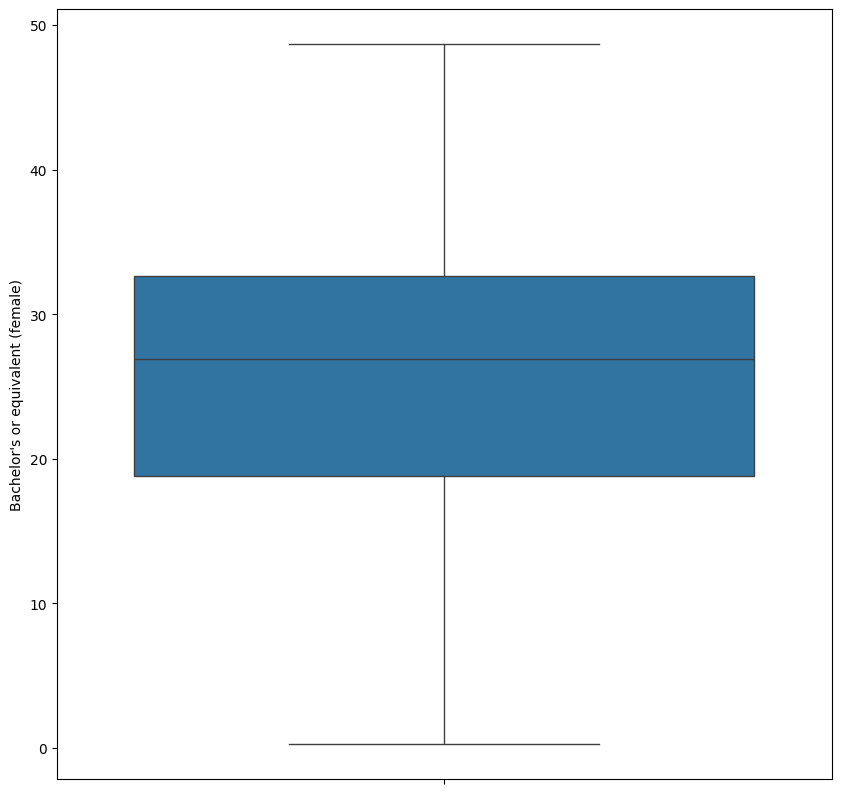

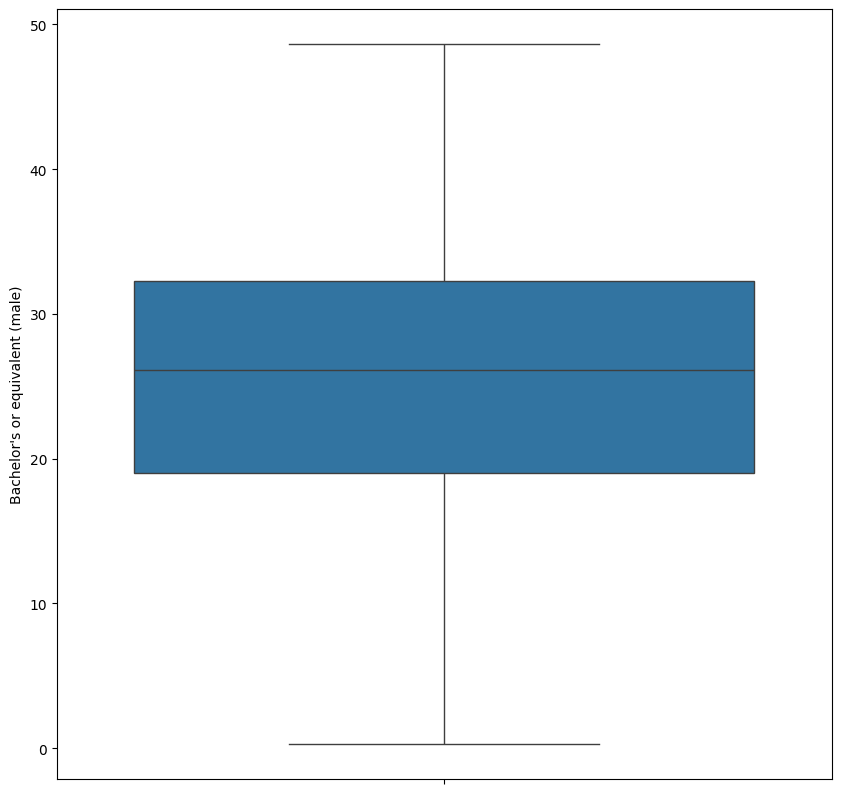

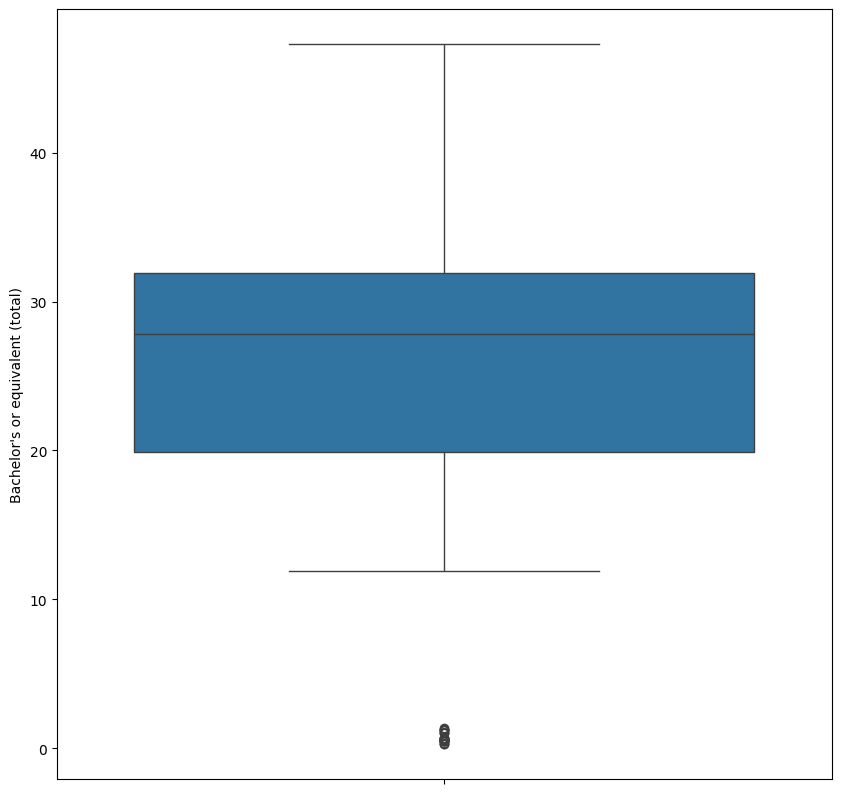

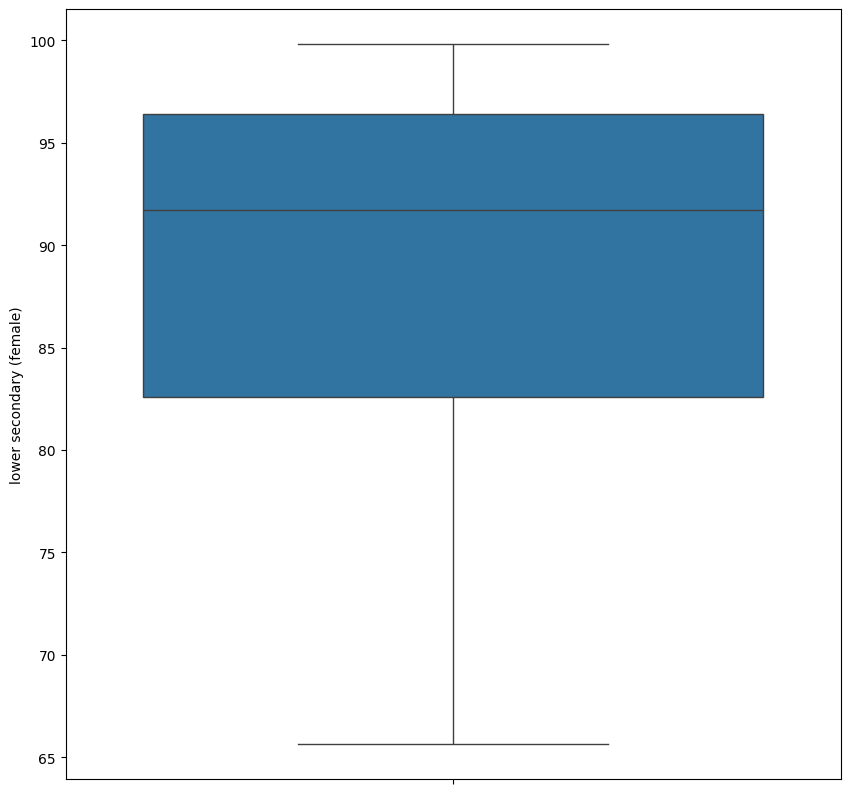

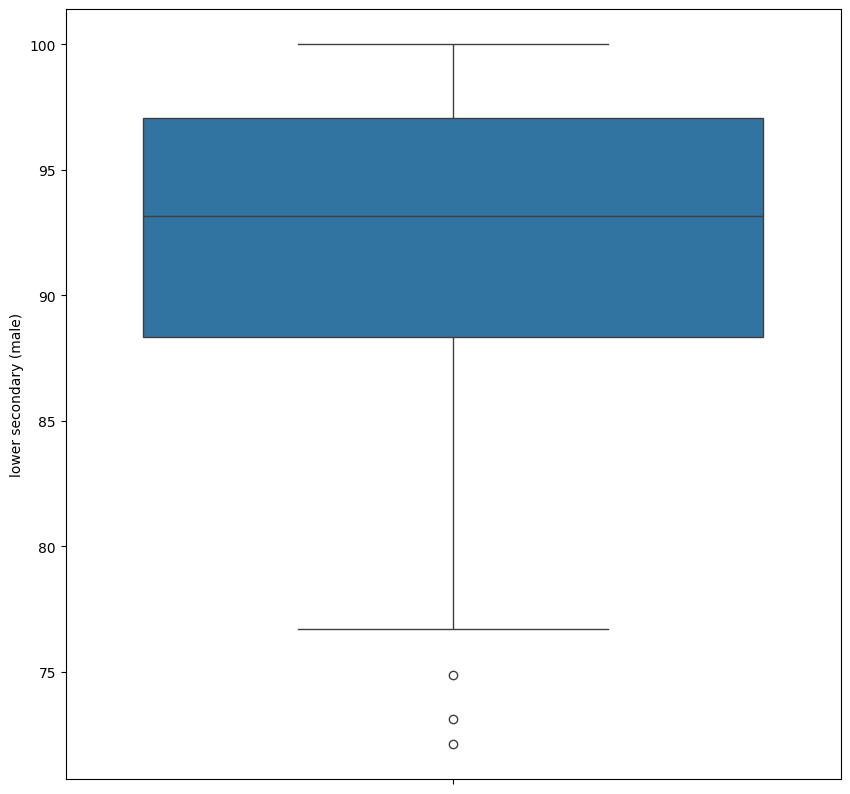

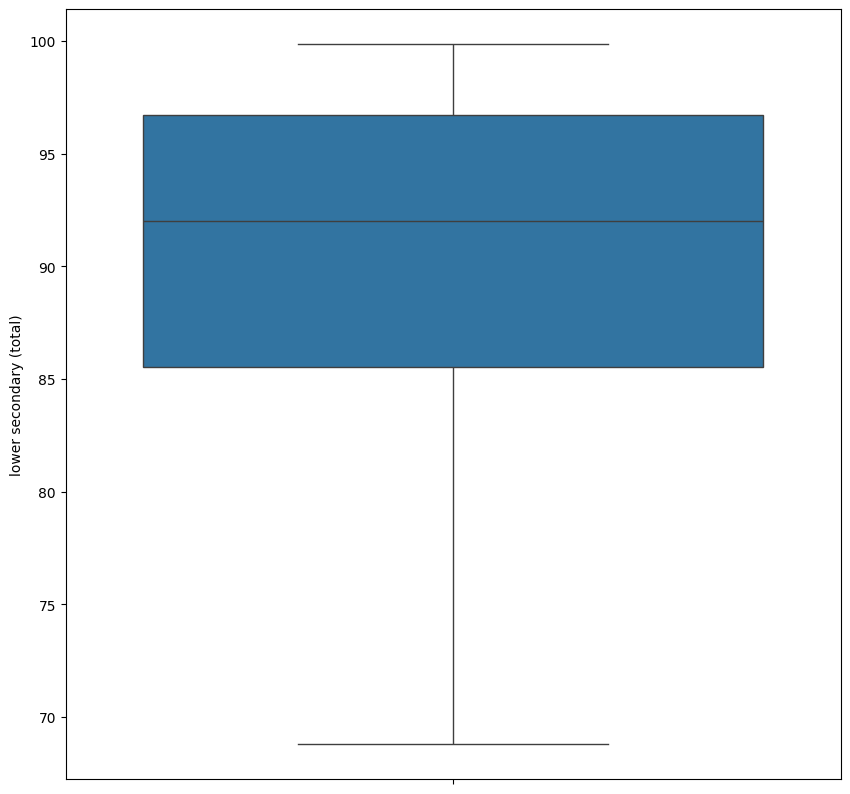

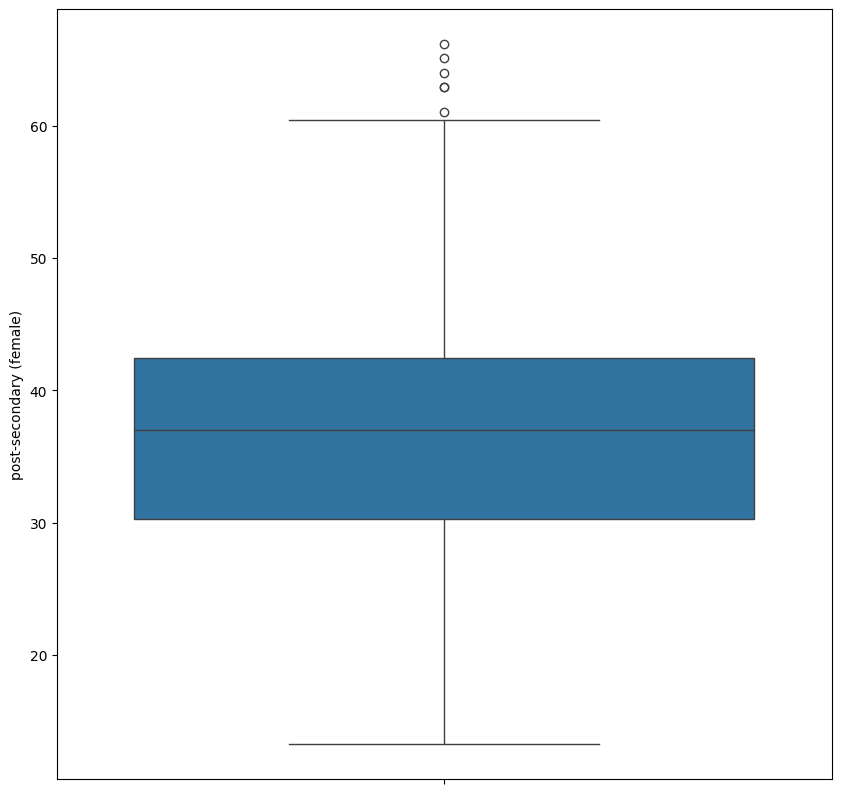

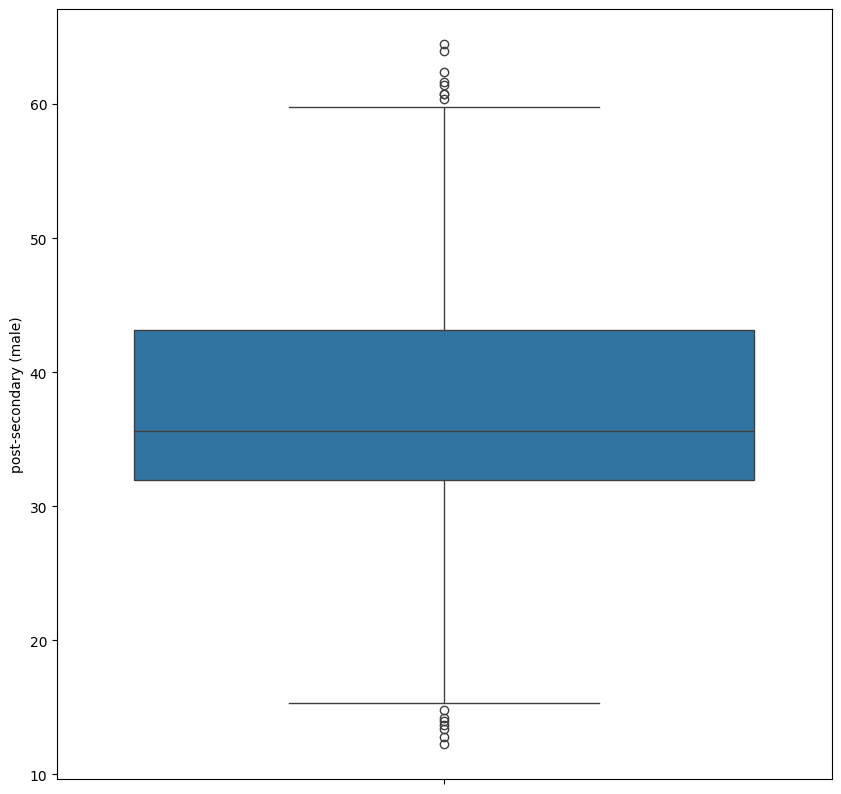

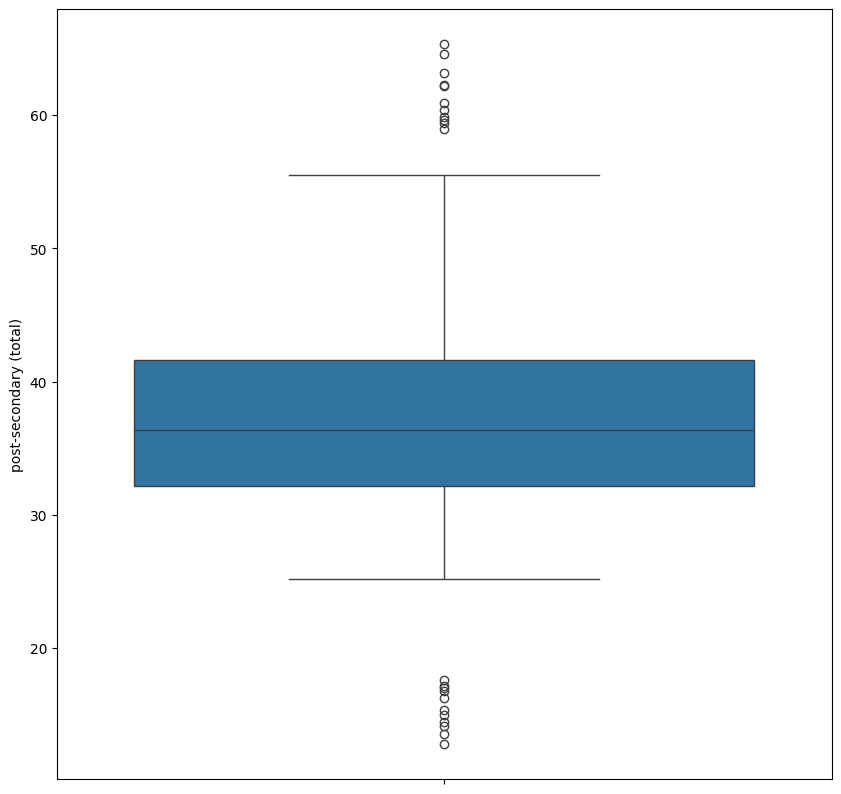

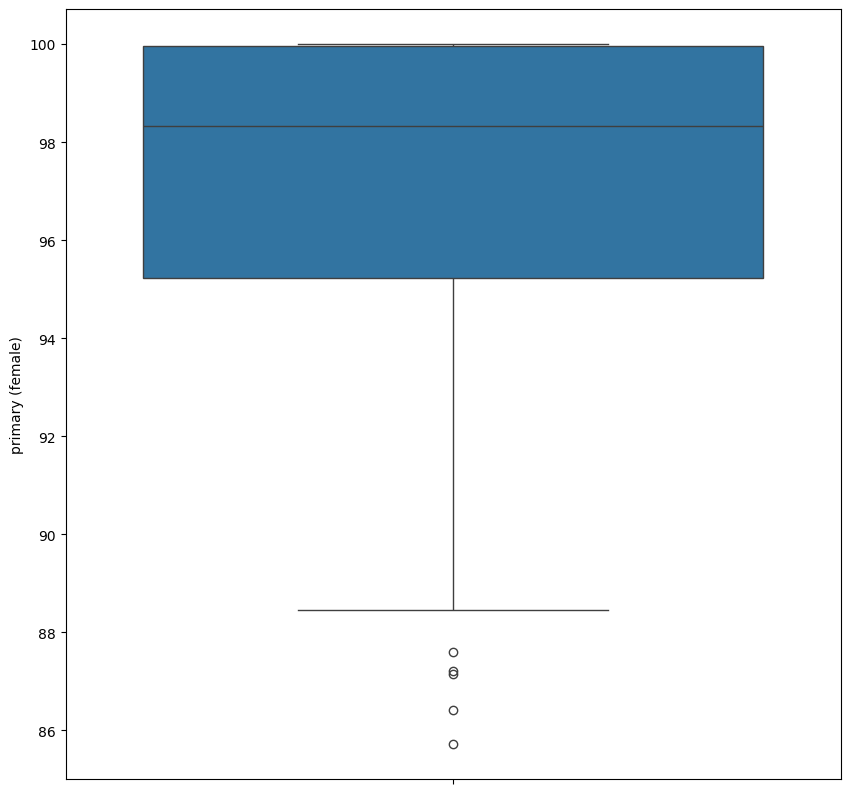

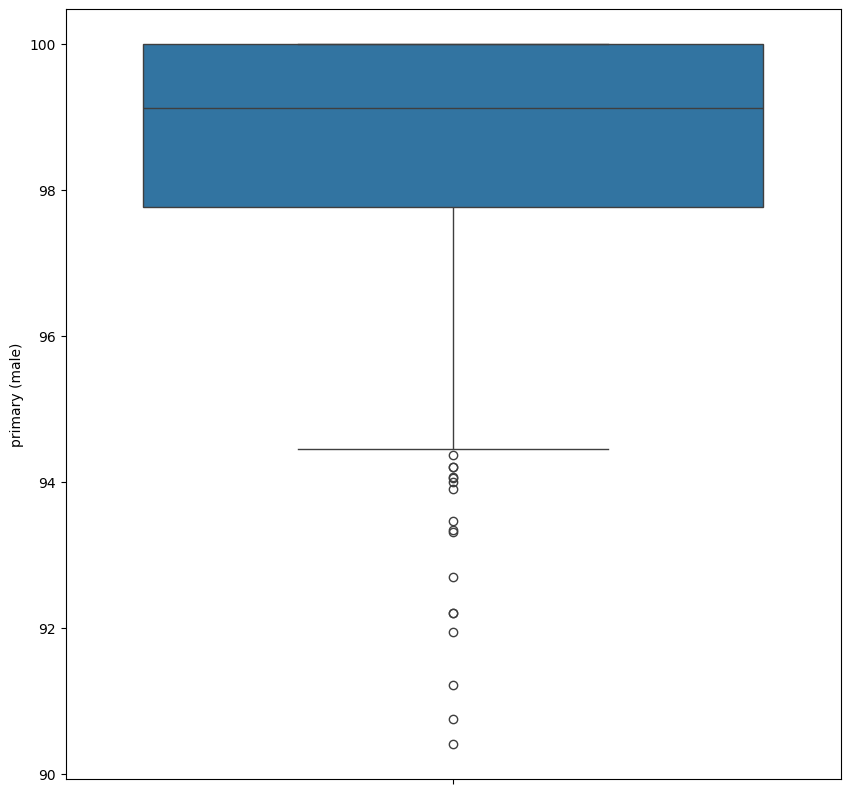

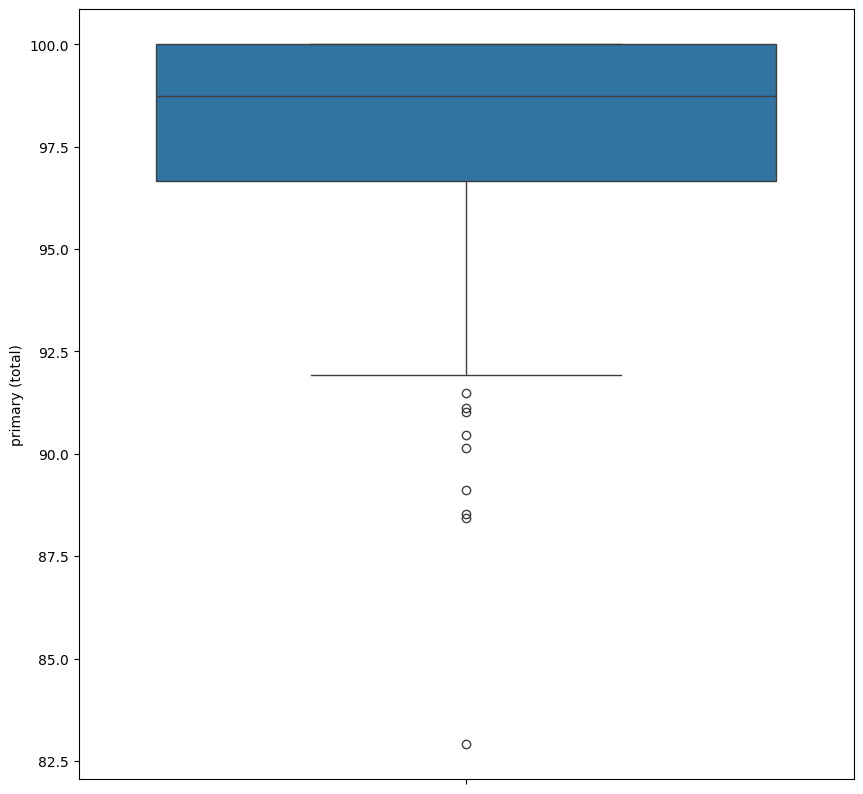

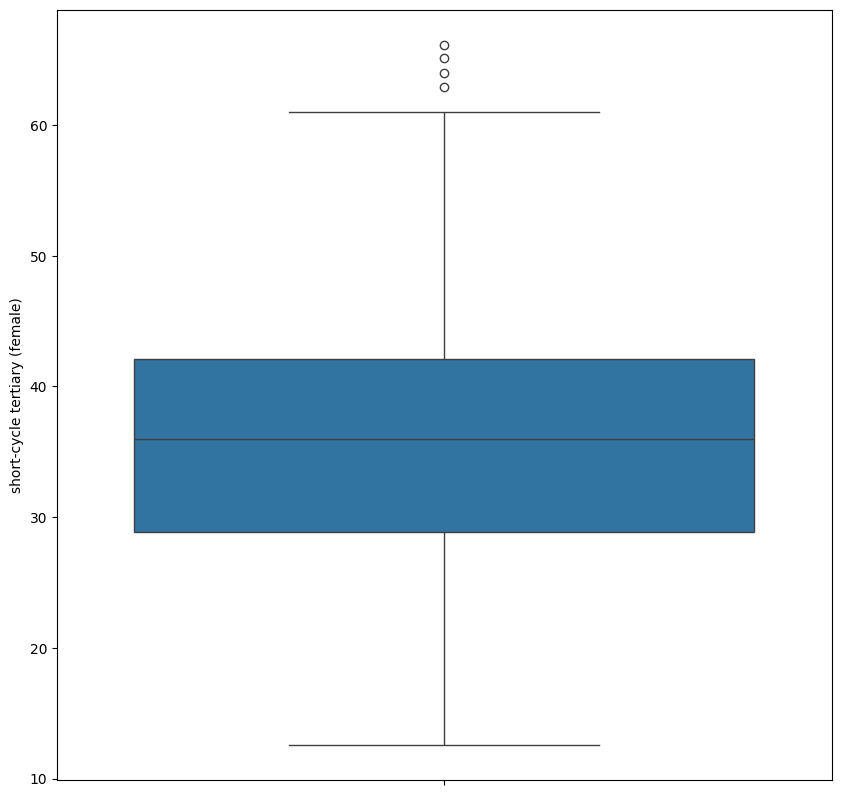

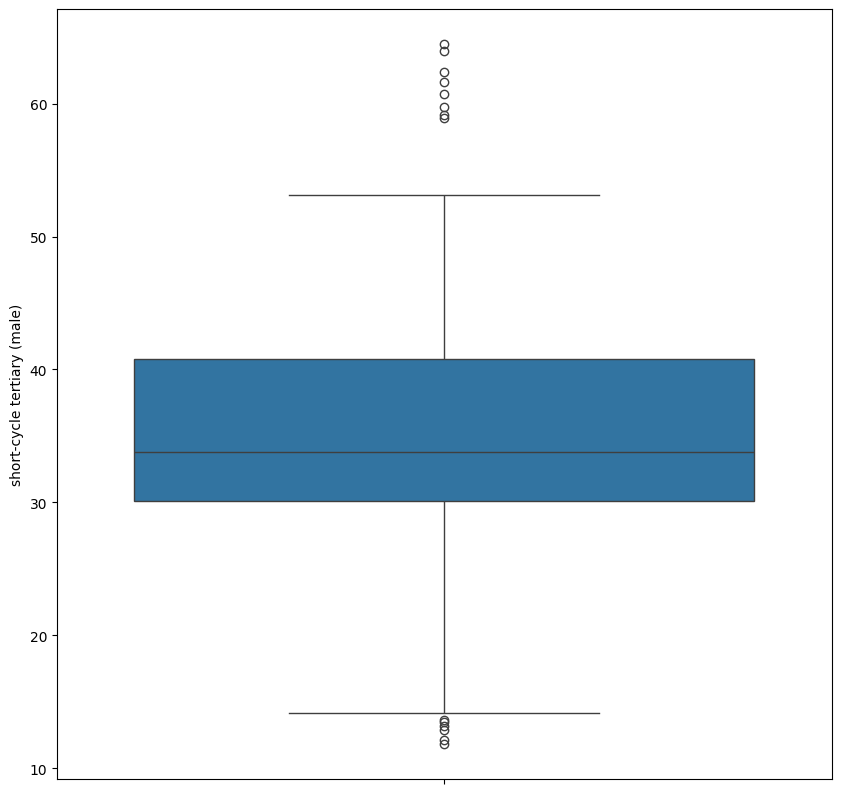

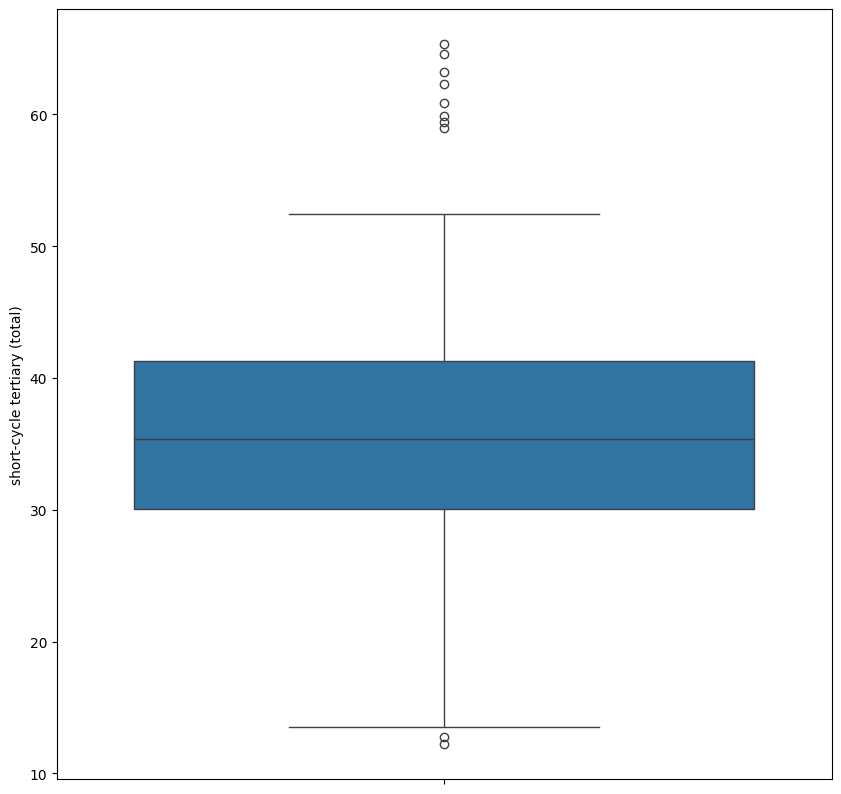

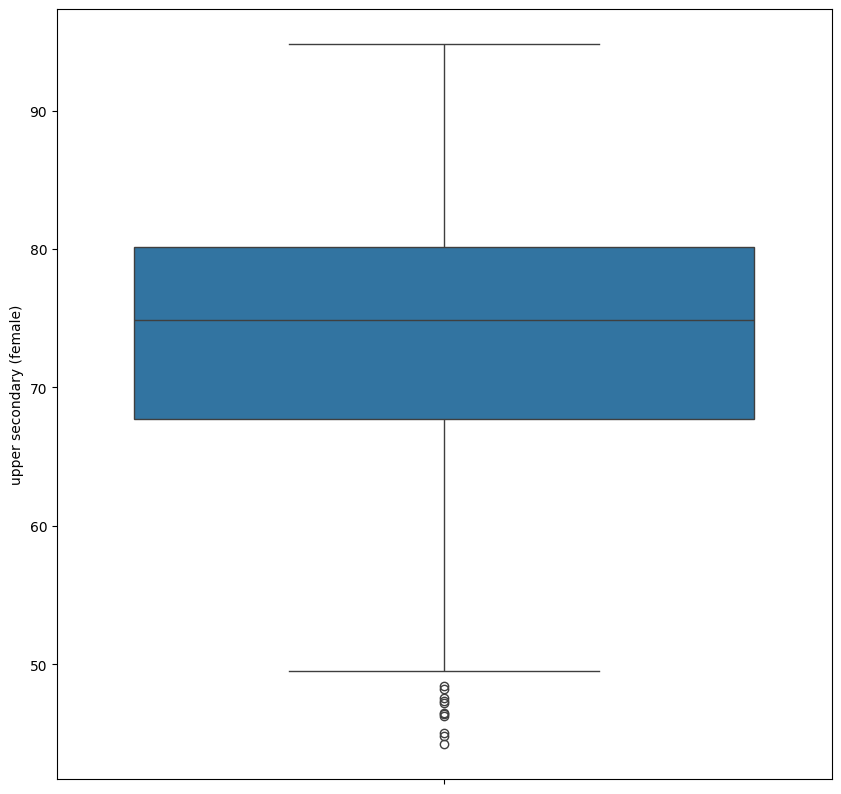

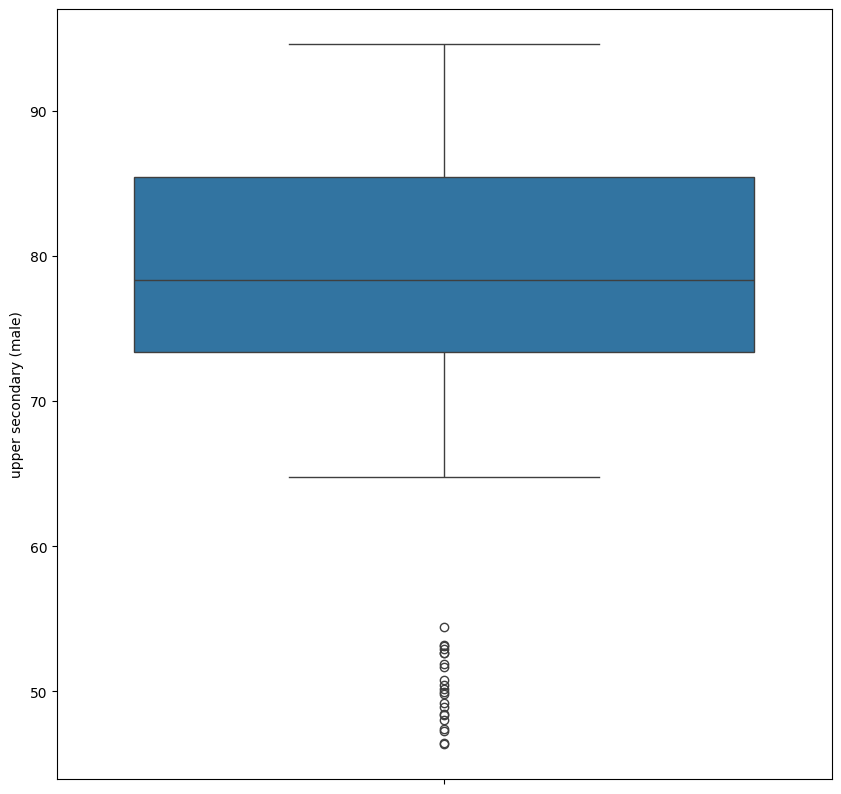

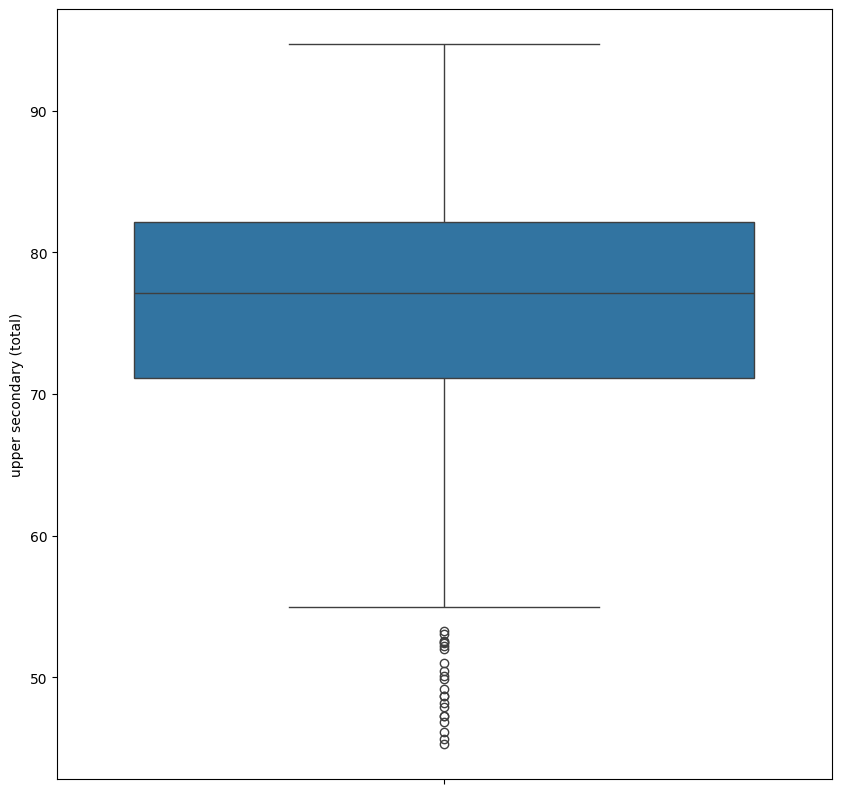

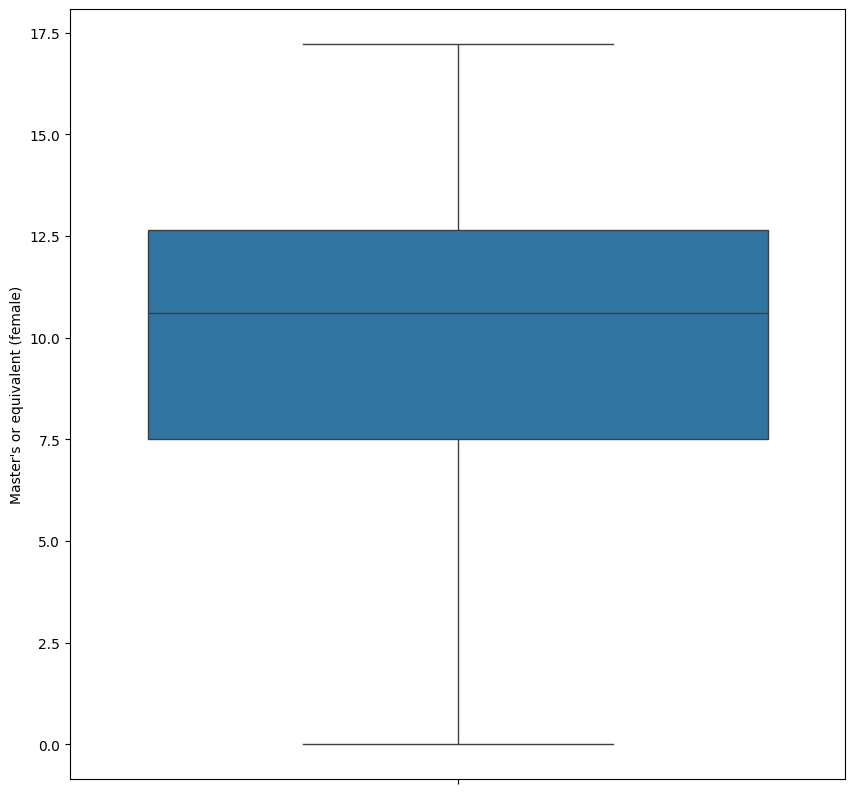

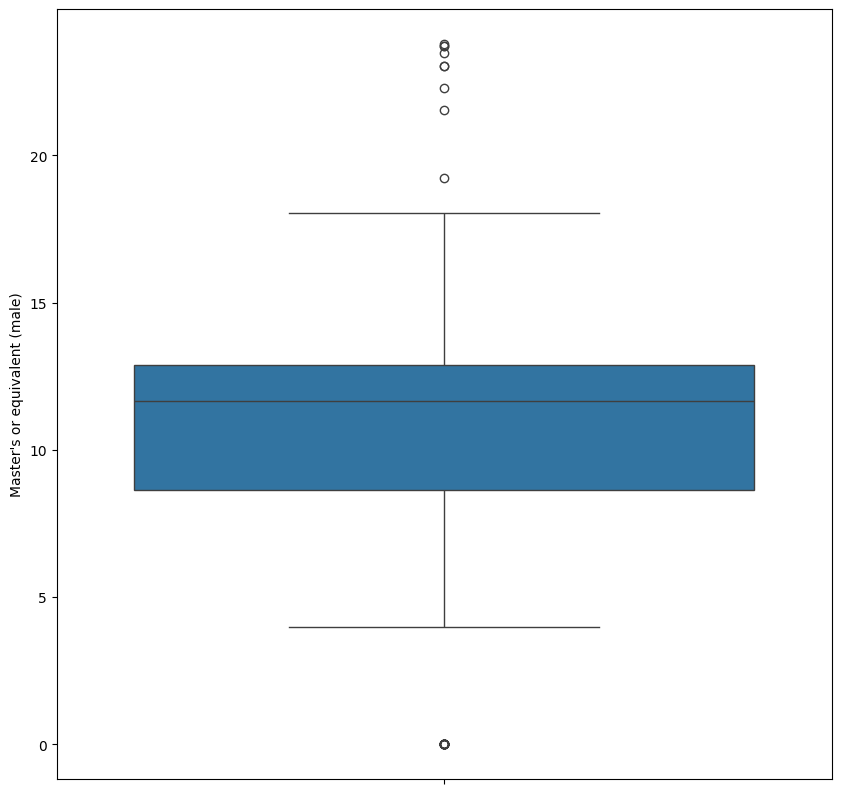

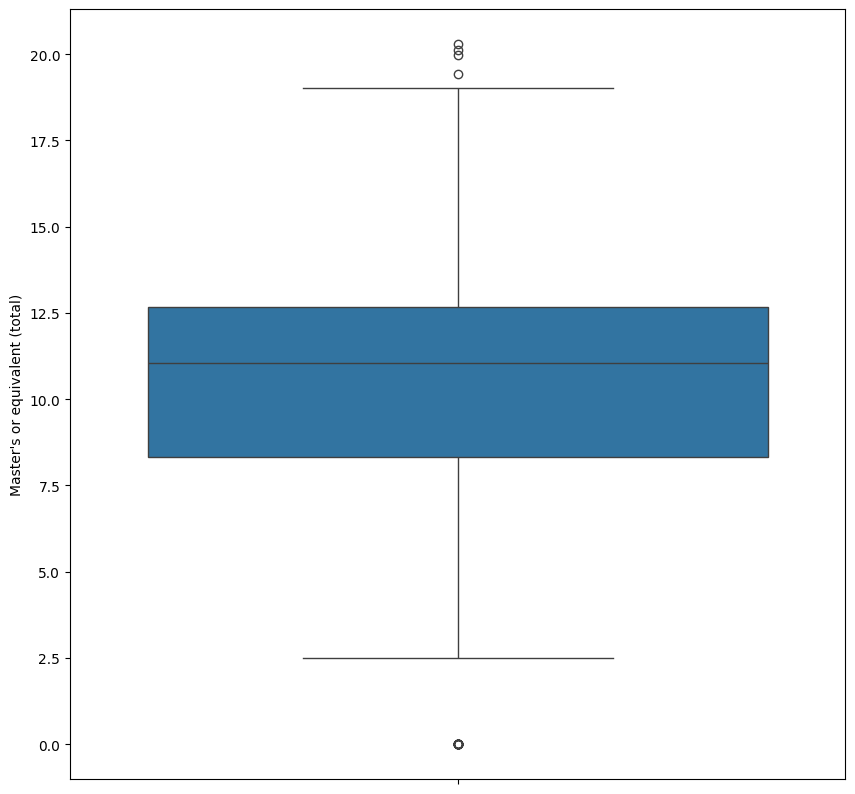

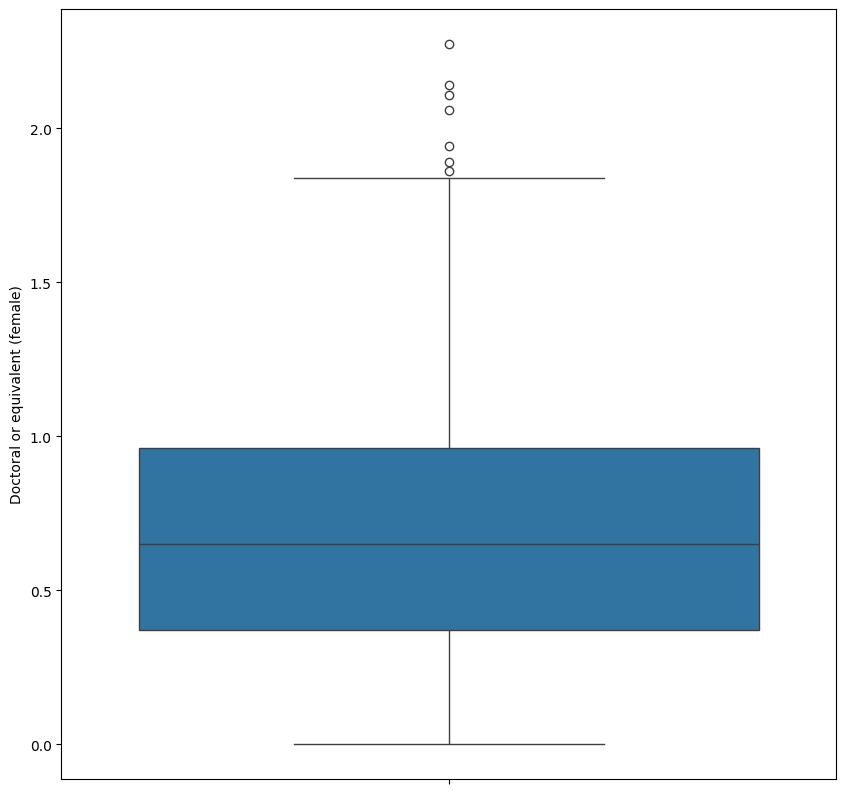

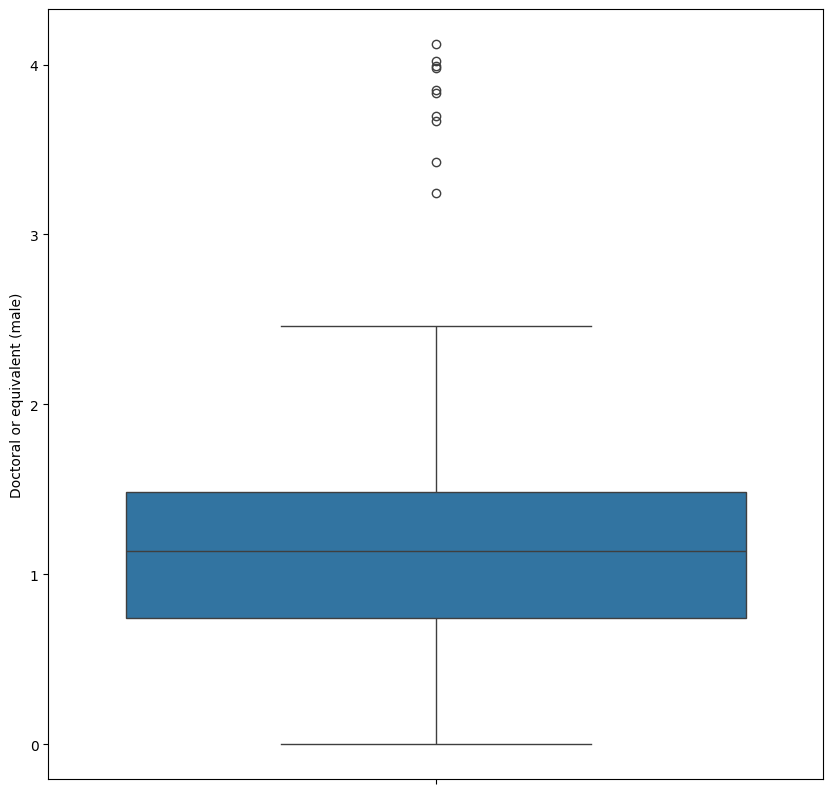

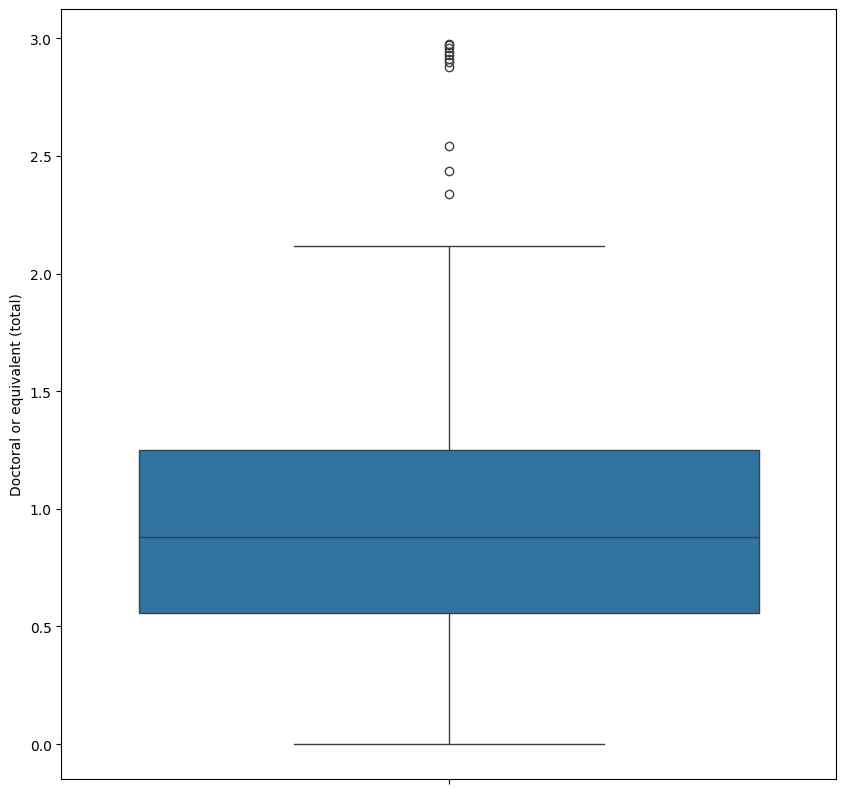

In [23]:
for i in df_Educational.columns:#check if there are outliers
    plt.figure(figsize=(10,10))
    sns.boxplot(df_Educational[i])
    plt.show()

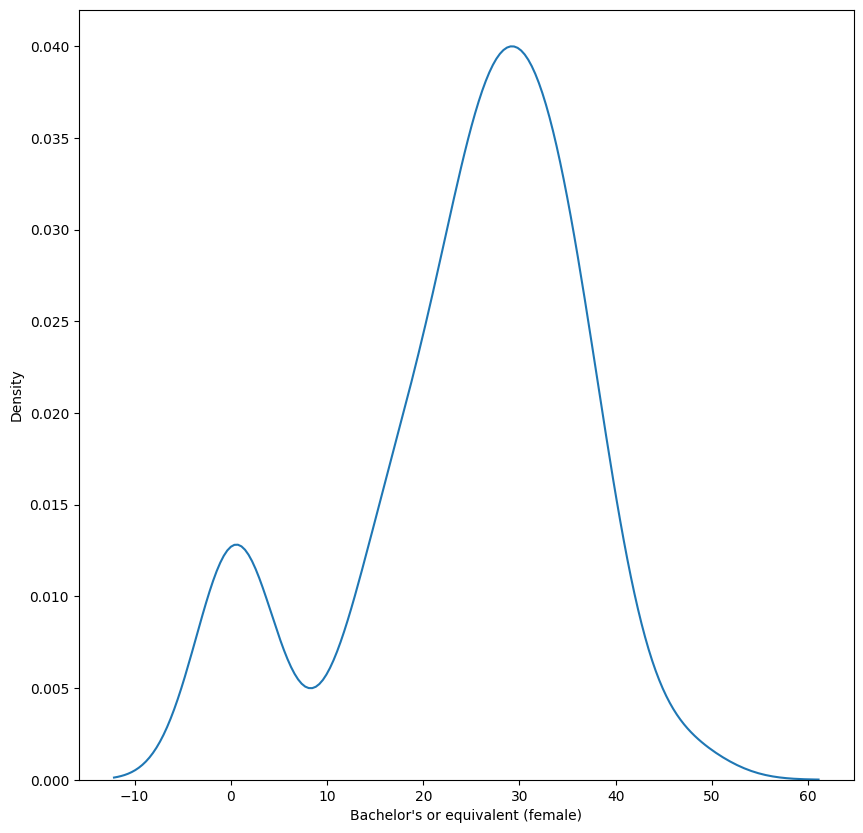

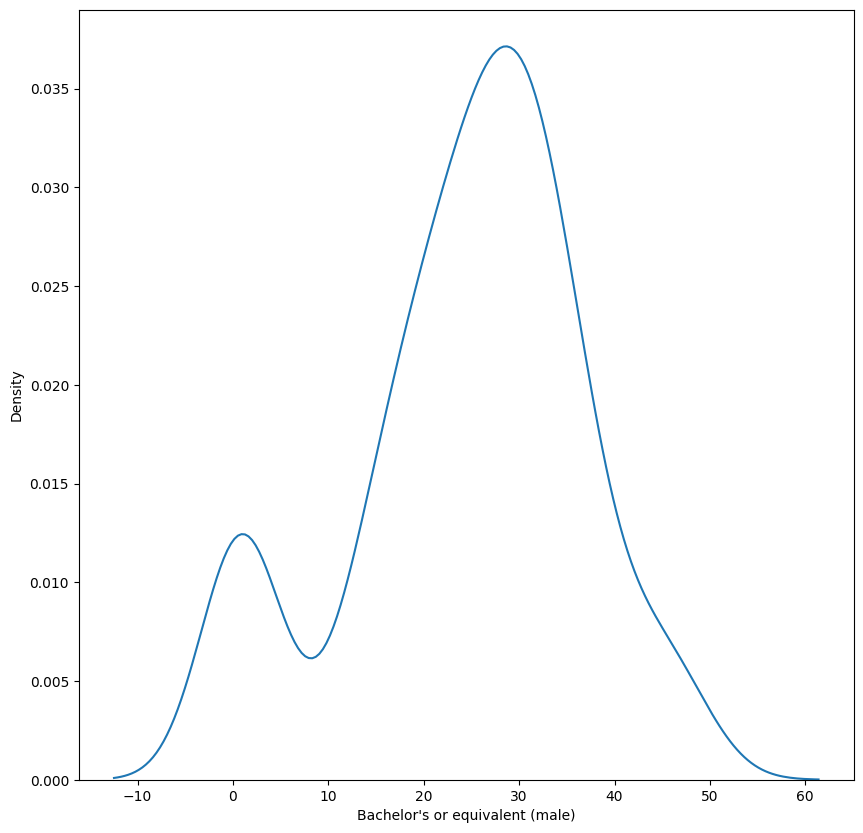

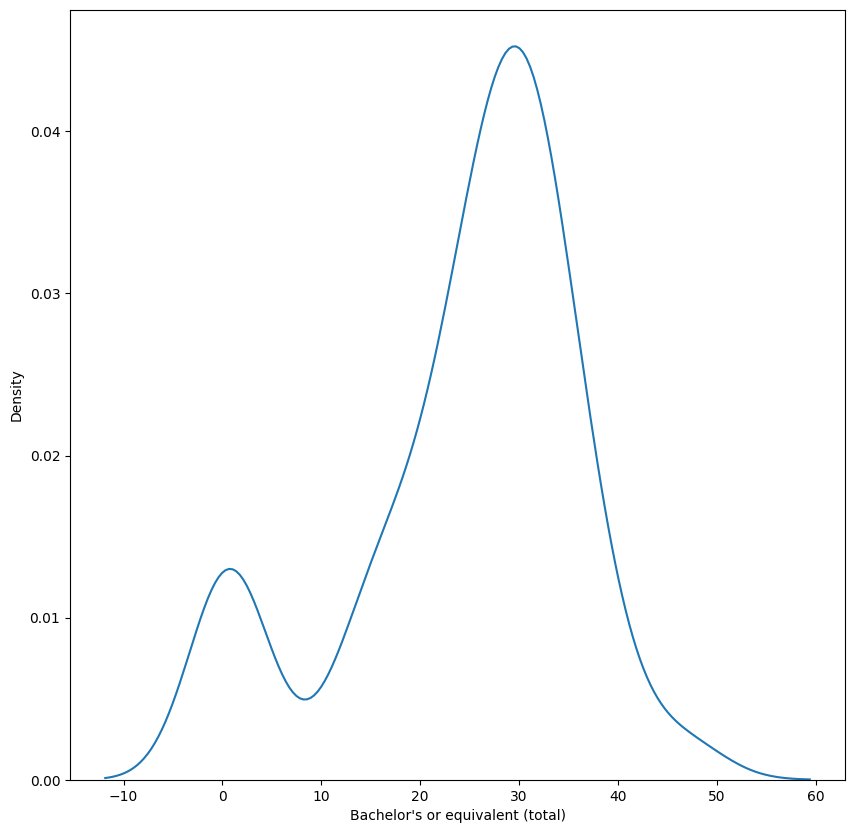

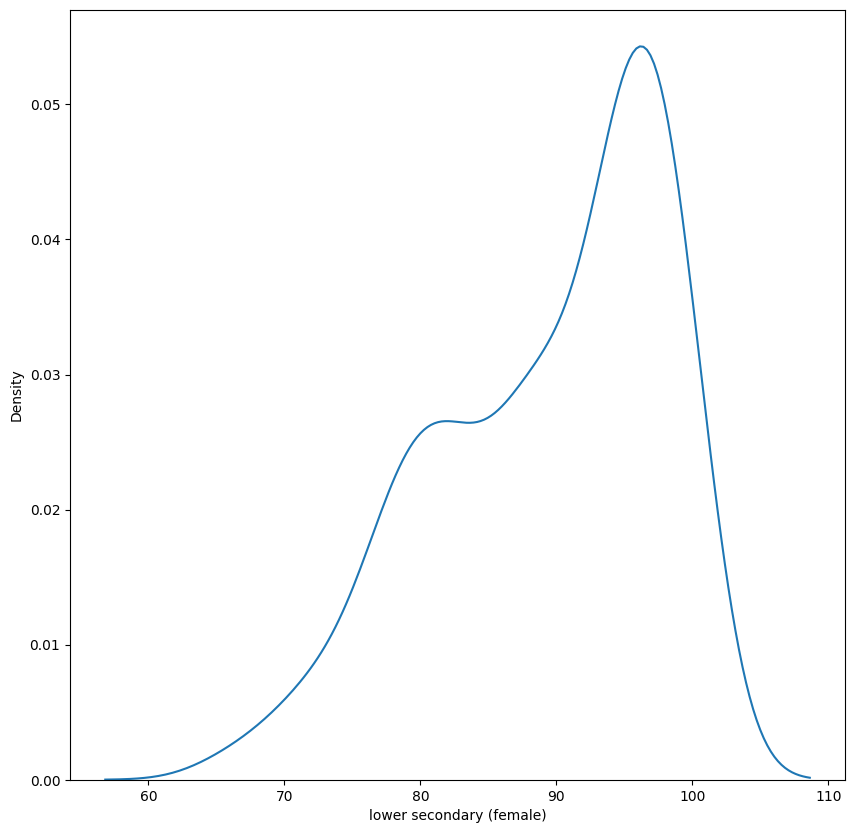

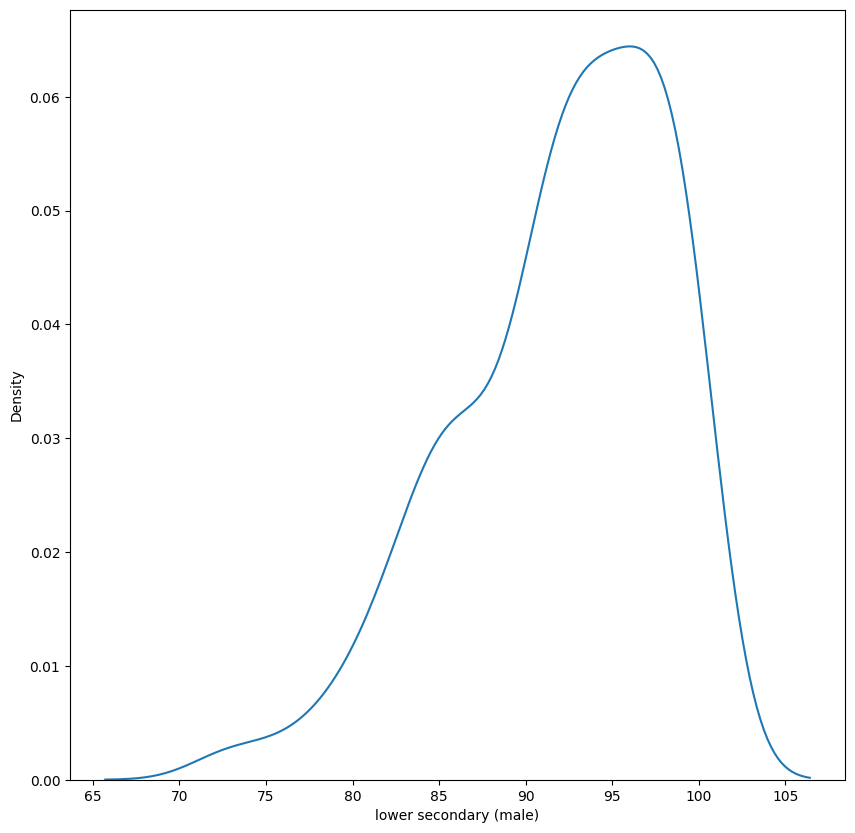

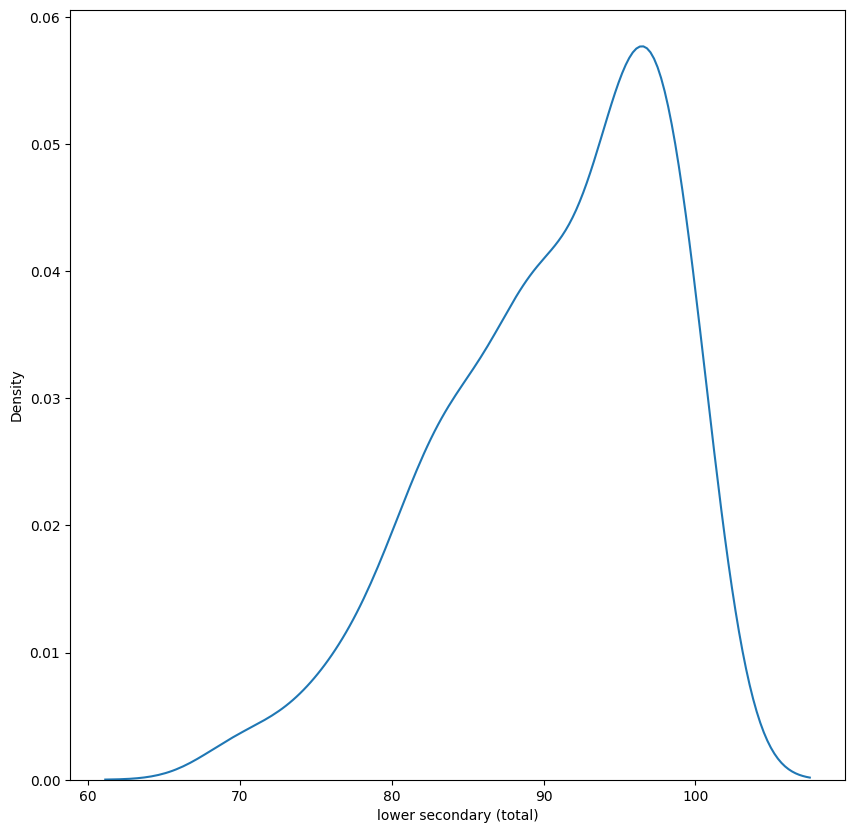

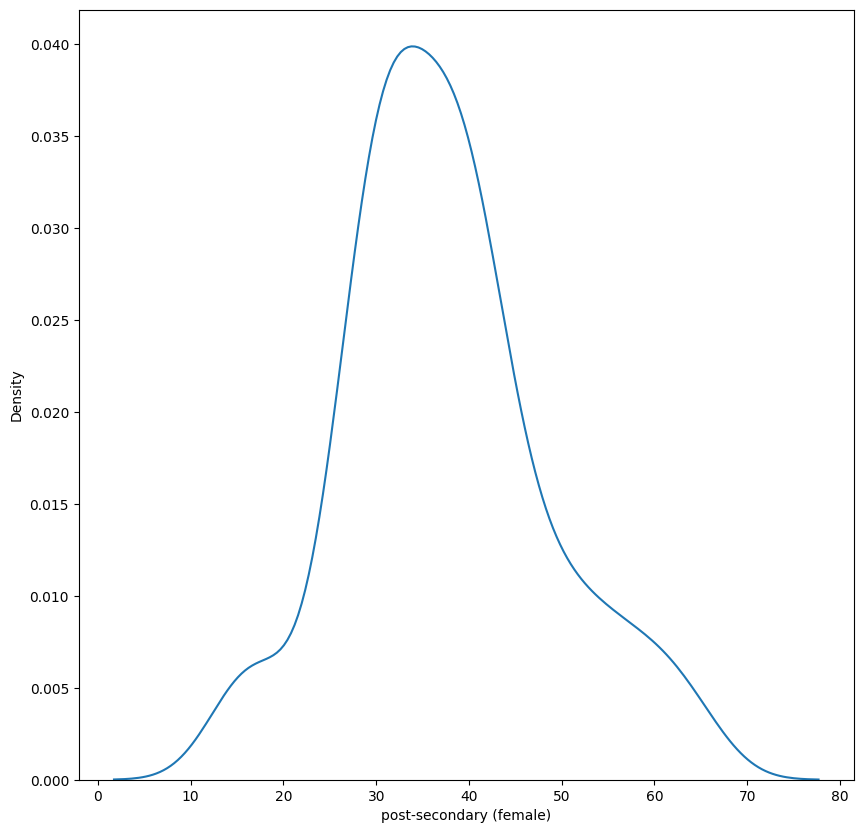

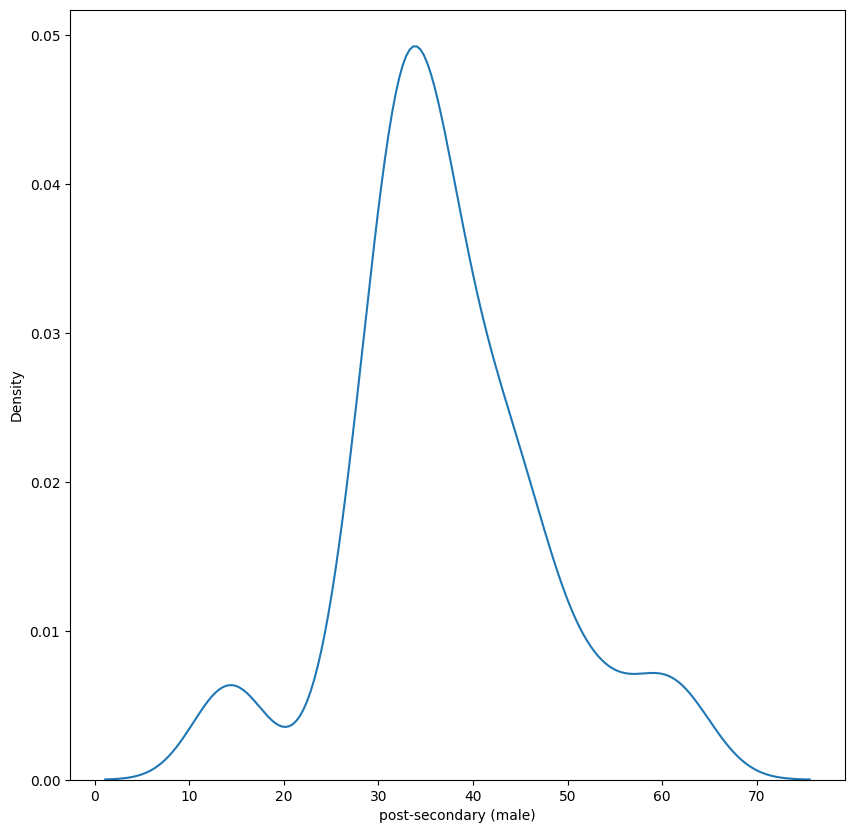

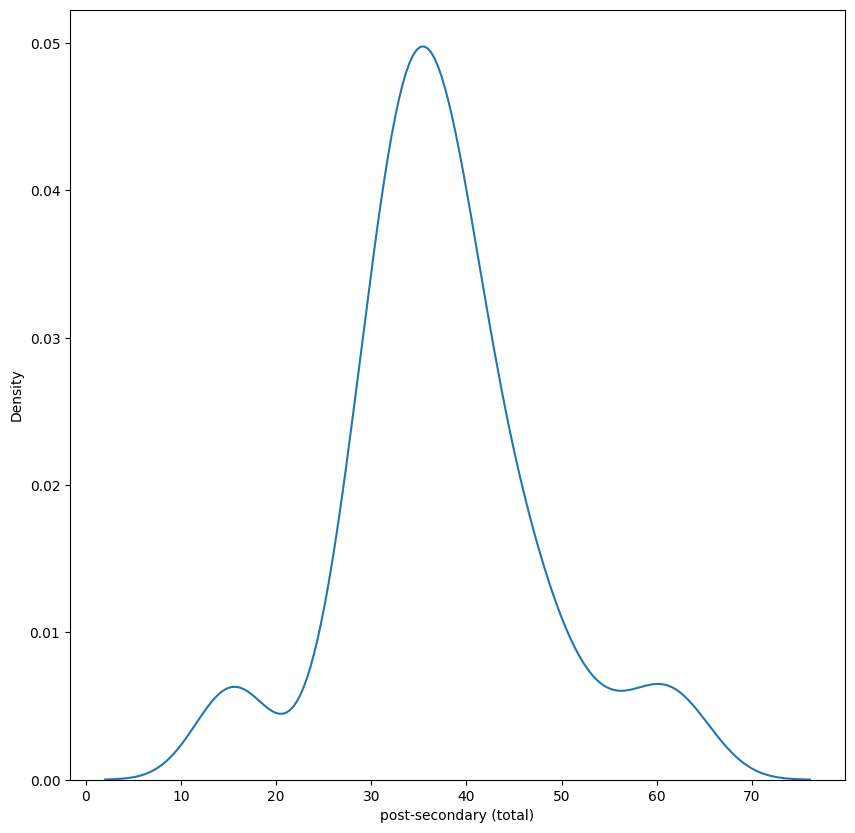

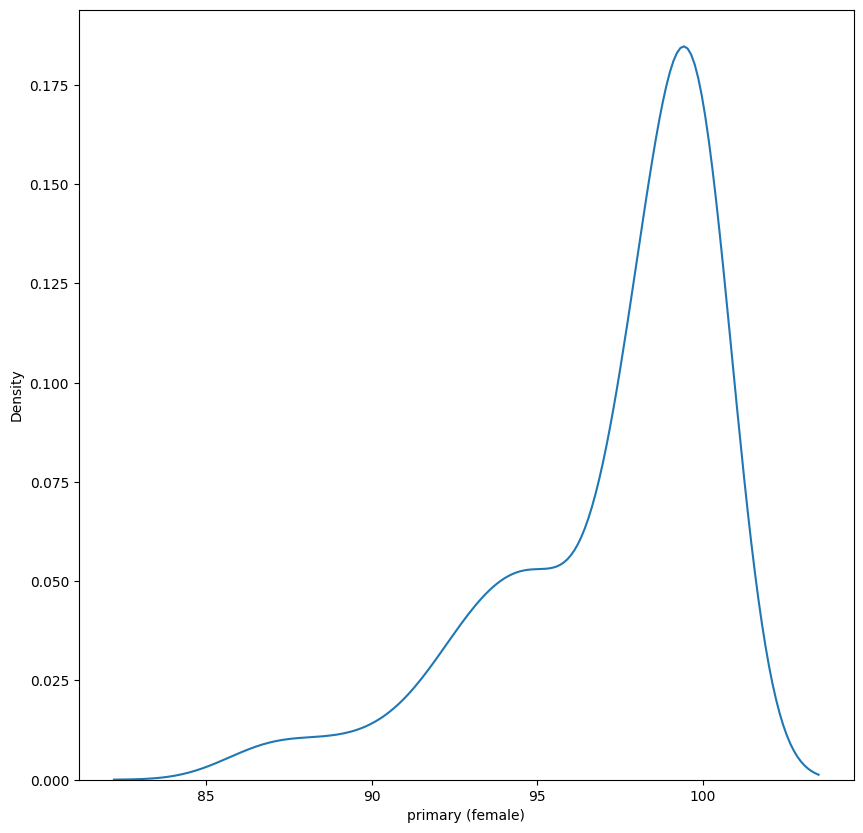

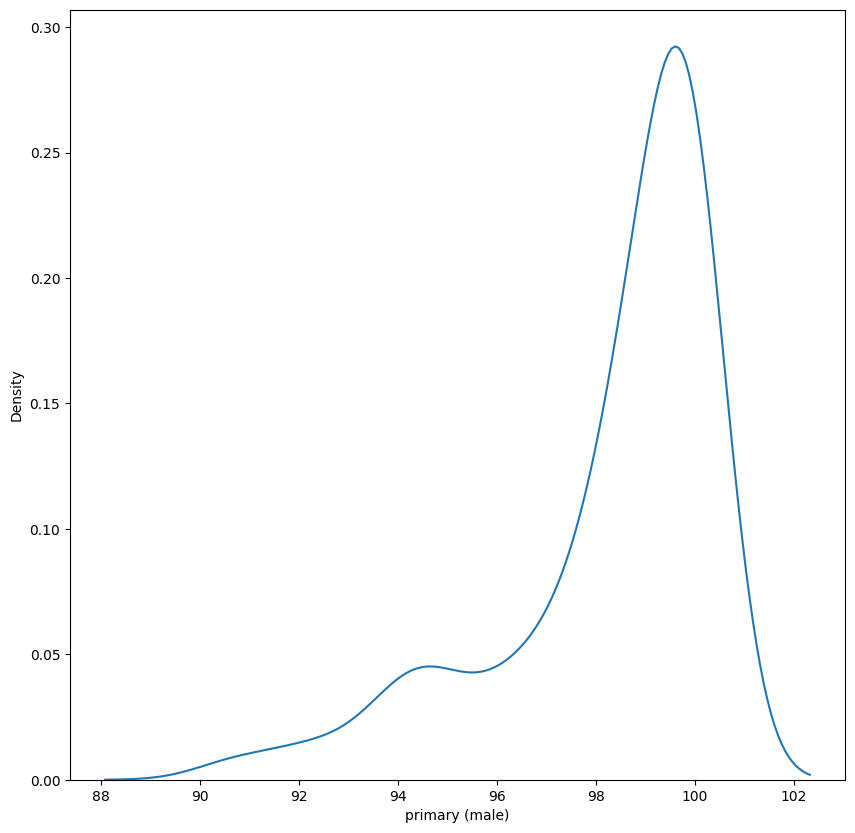

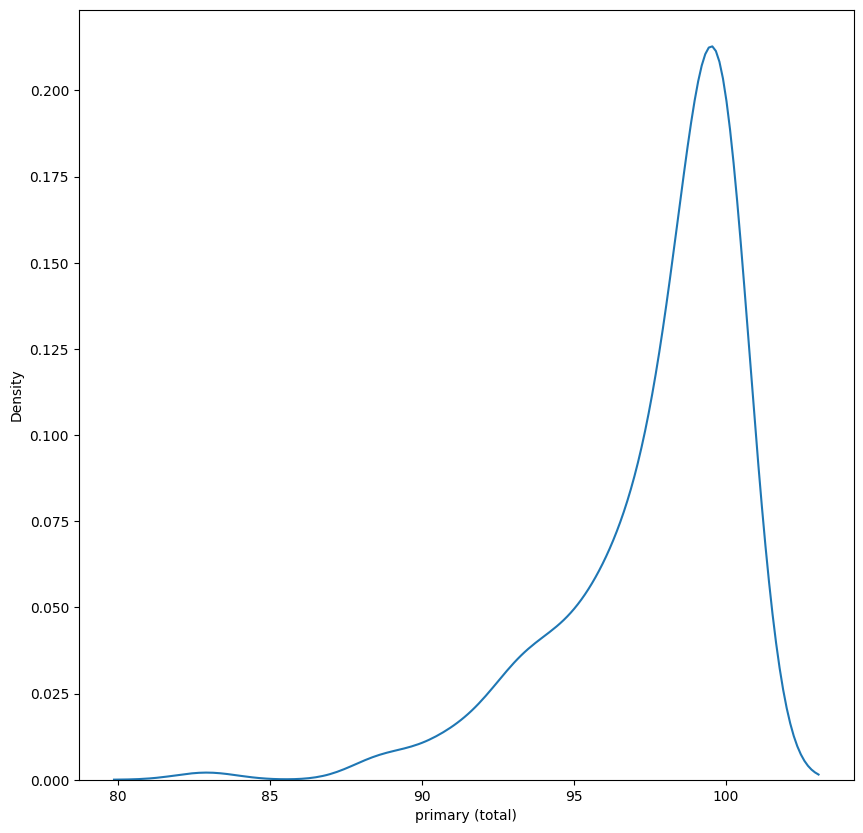

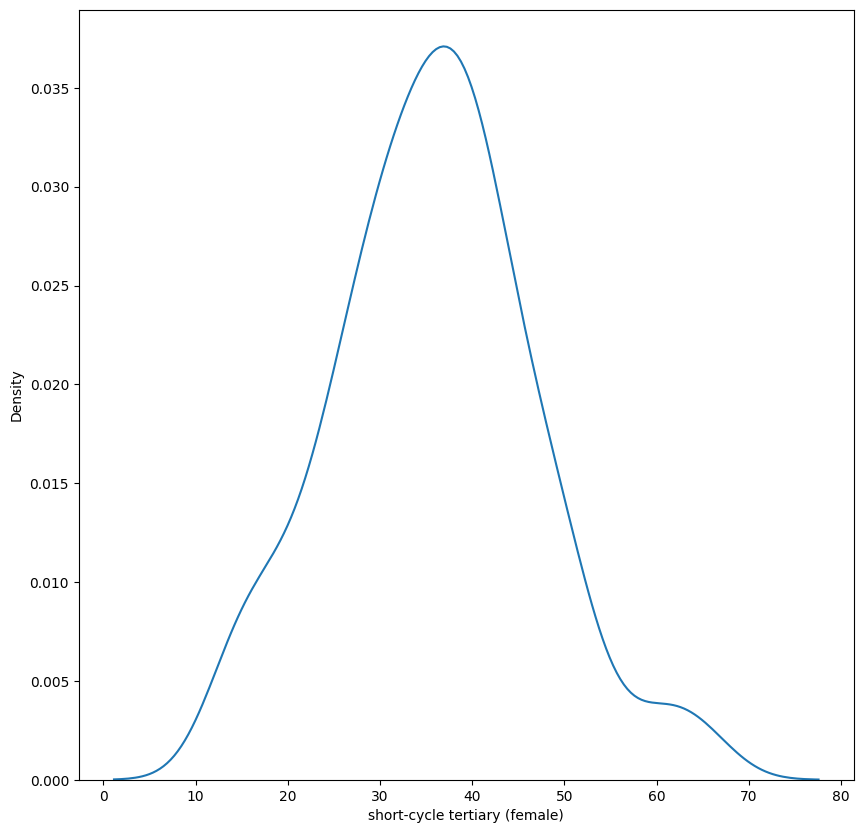

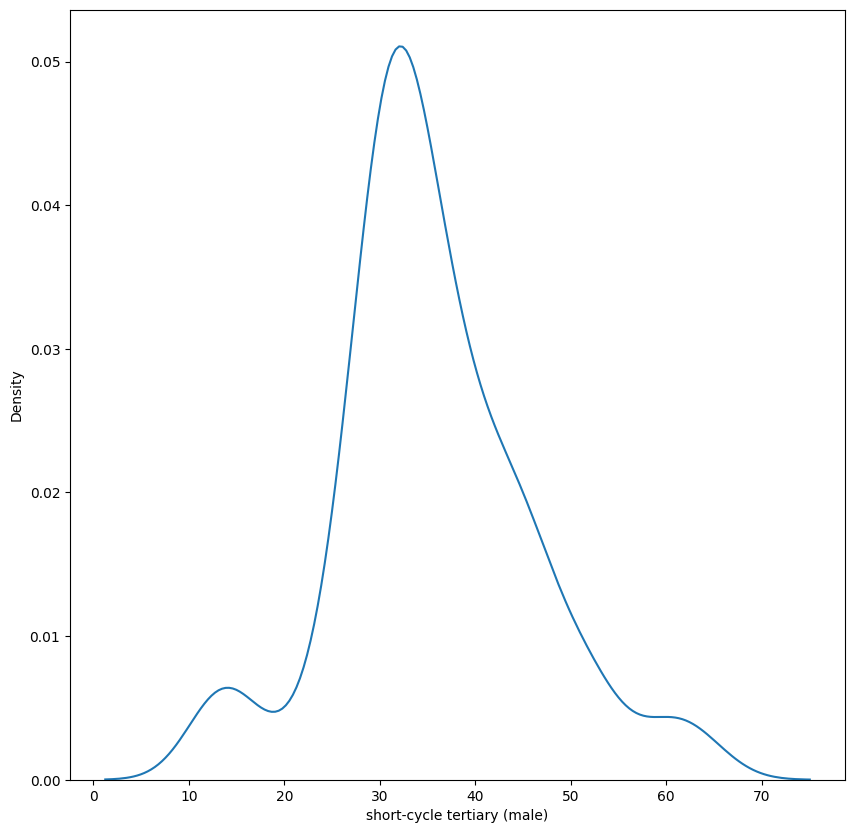

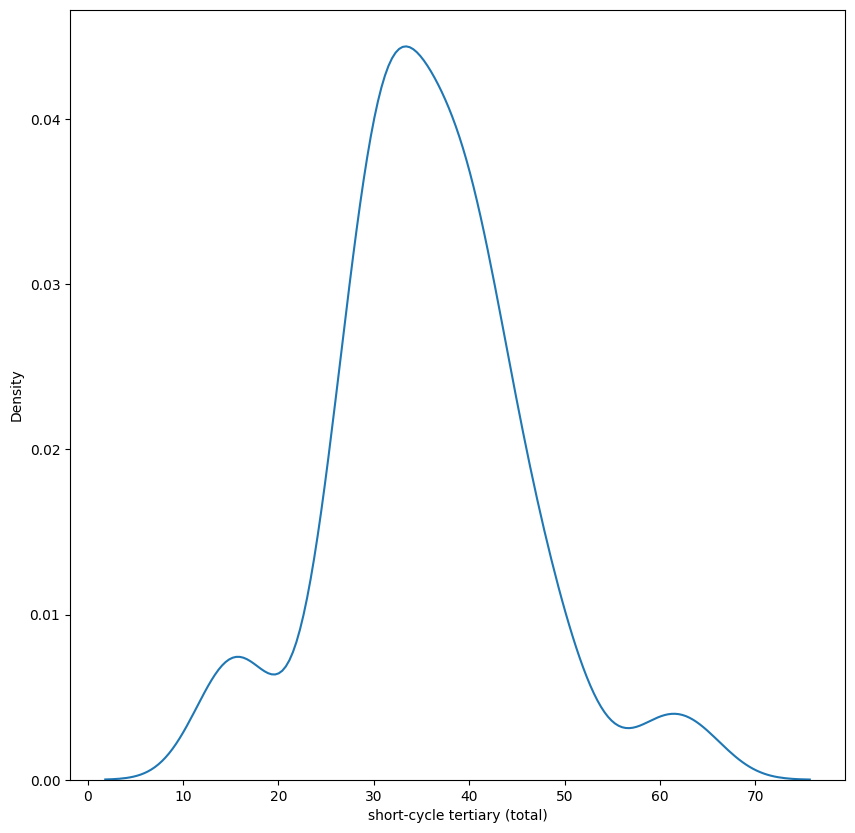

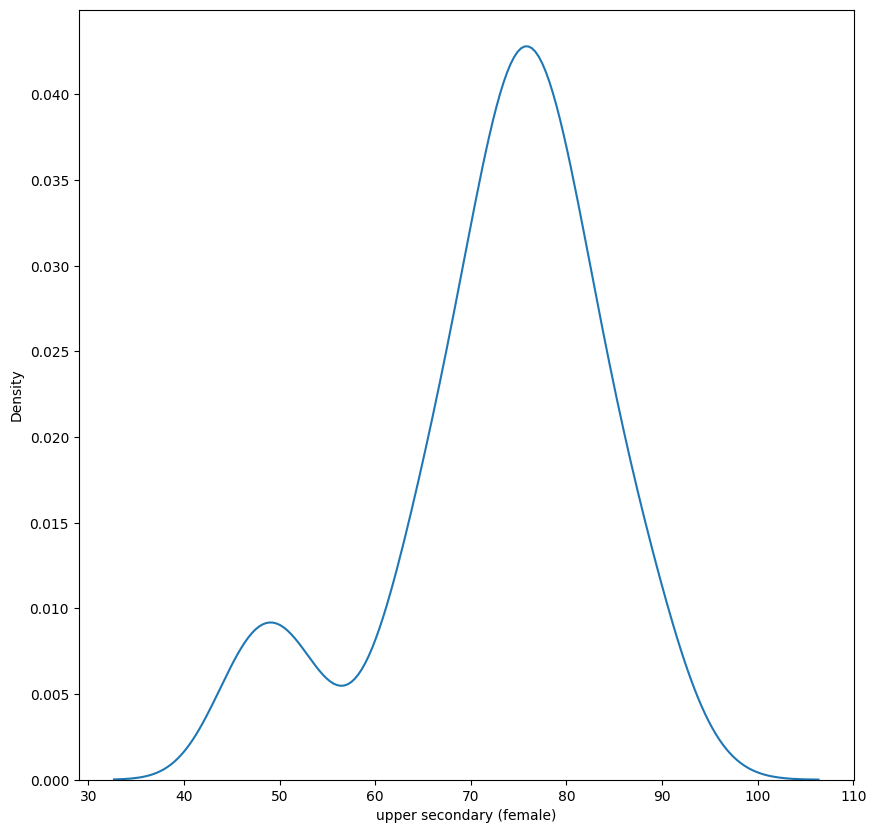

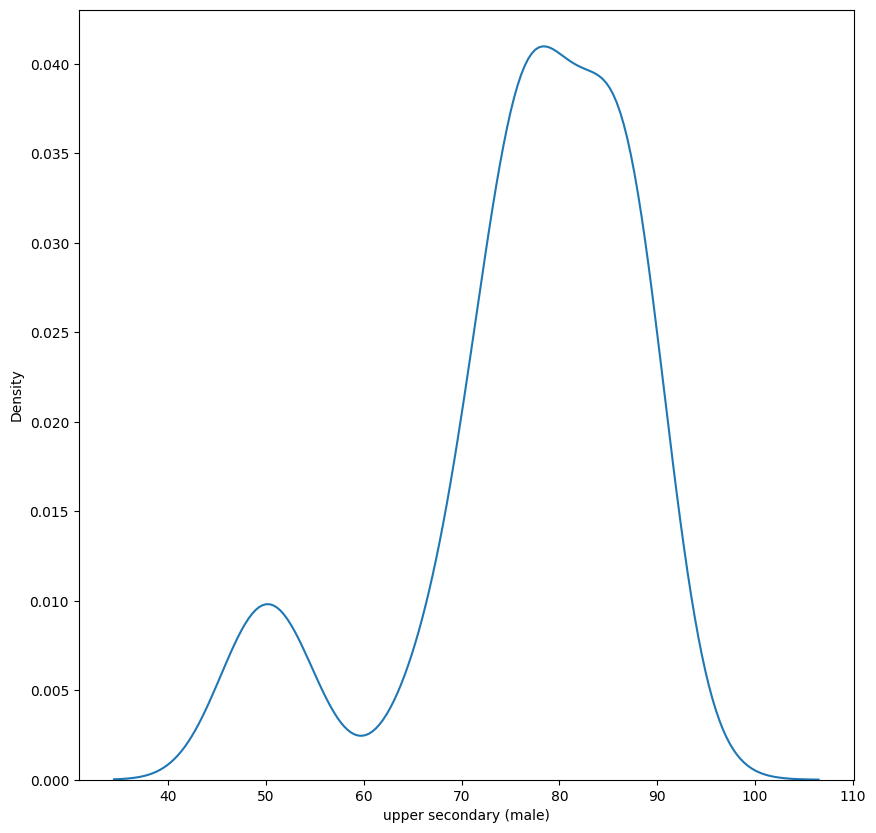

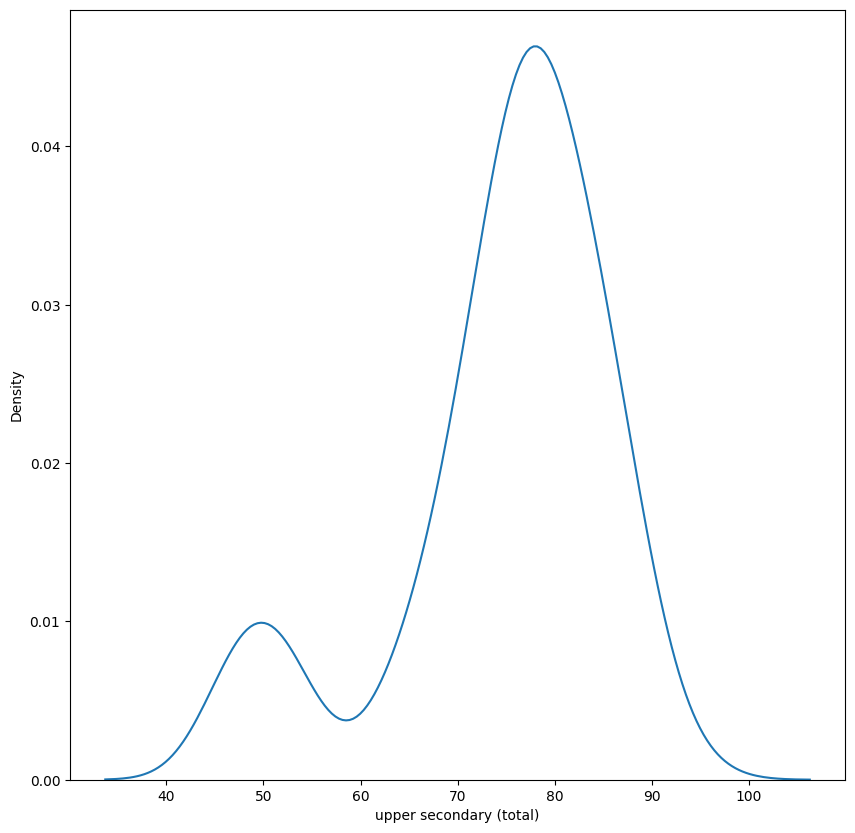

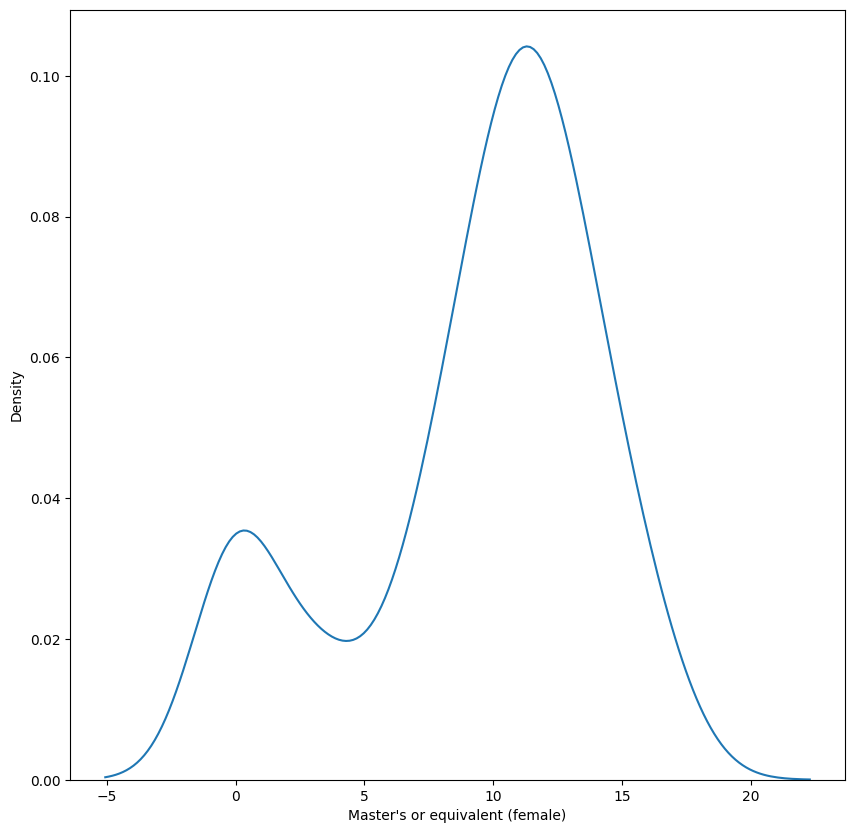

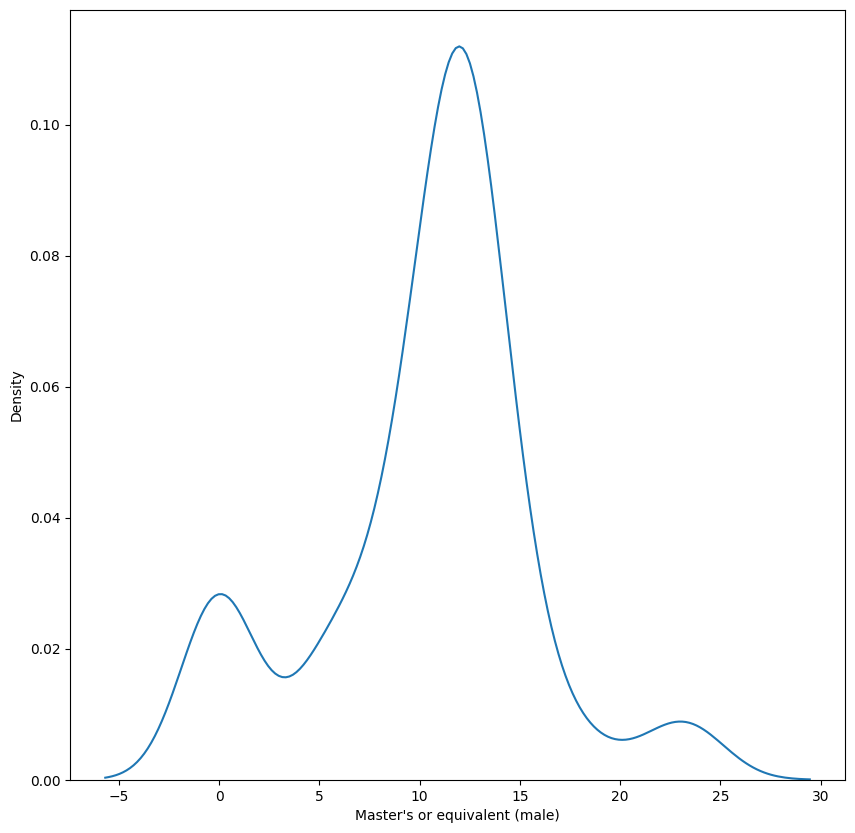

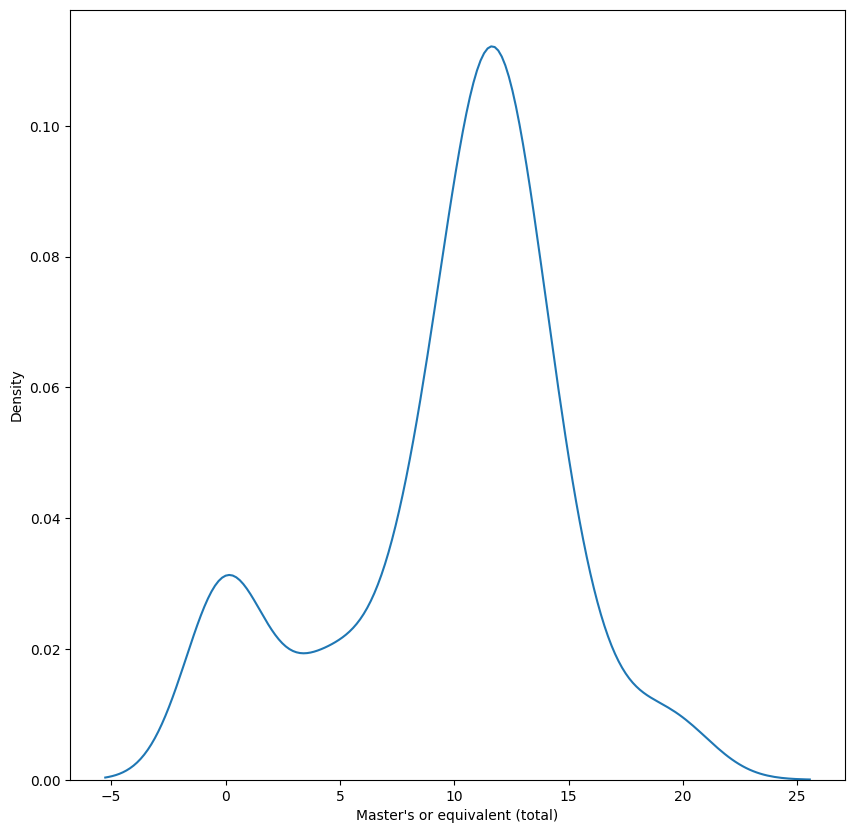

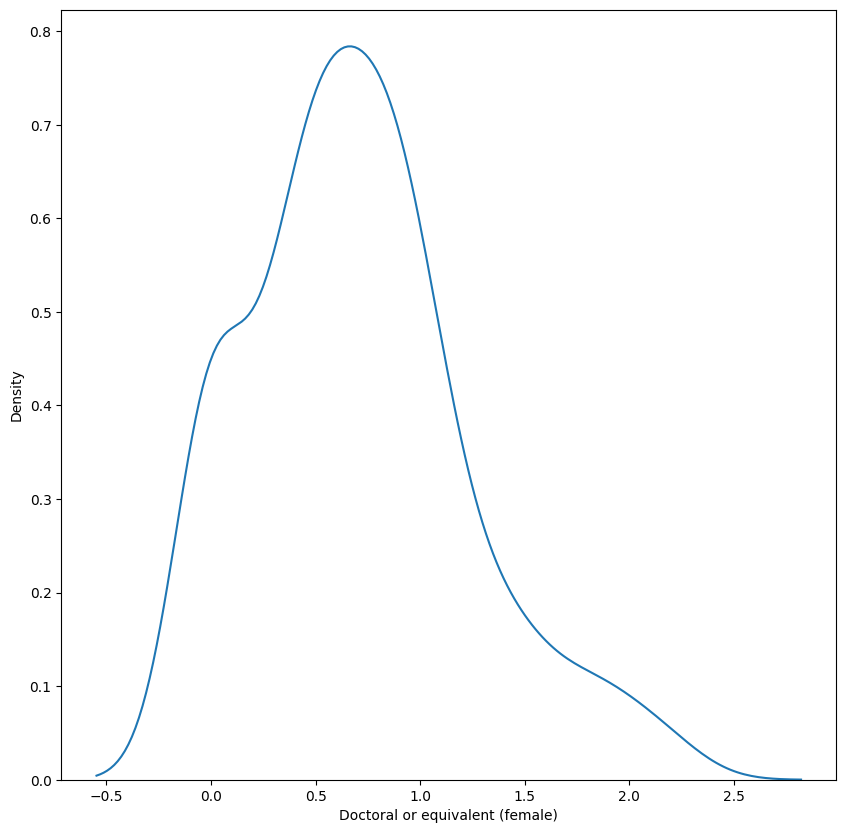

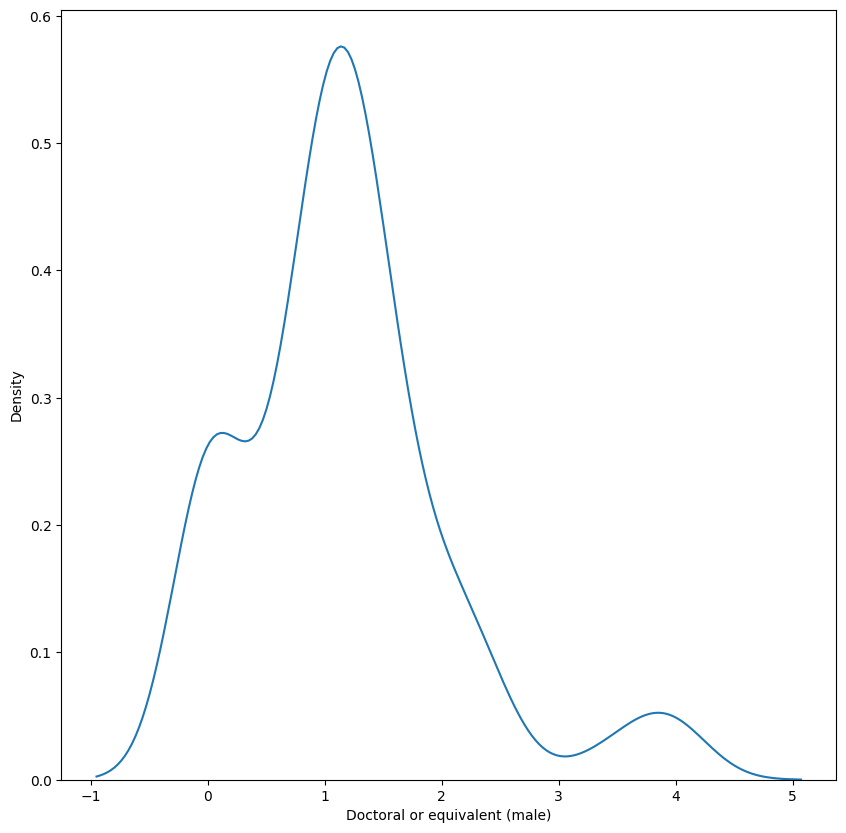

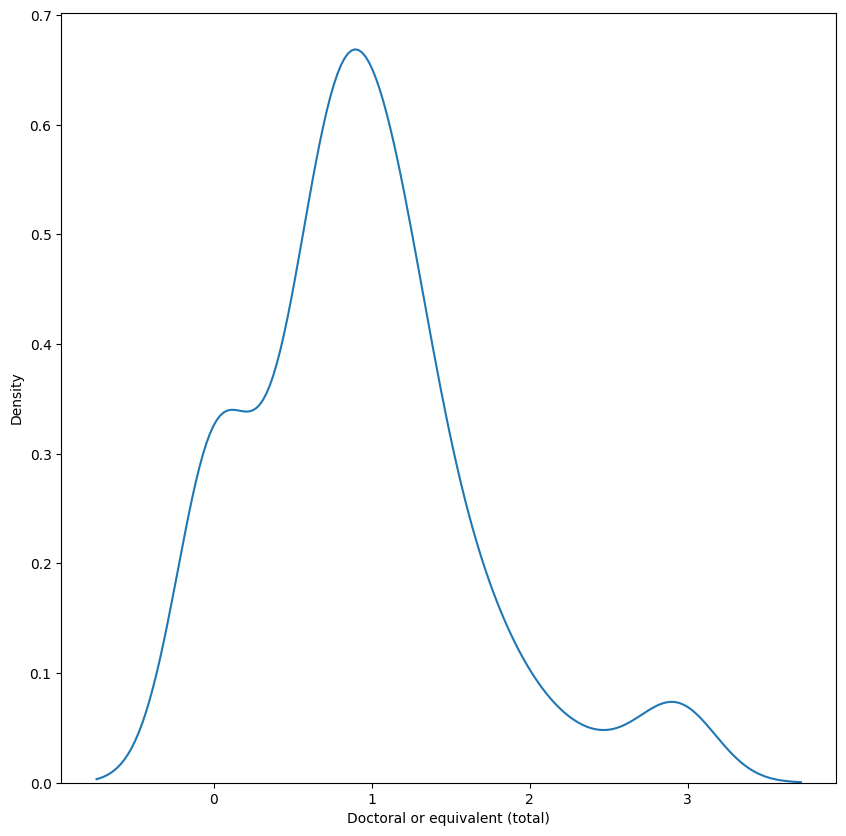

In [24]:
for i in df_Educational.columns:# also check the distribution of data
      plt.figure(figsize=(10,10))
      sns.kdeplot(df_Educational[i])
      plt.show()

In [25]:
#here I see what is the suitable form to fill empty value based on kdeplot above.
#either (mean,median)

In [26]:
cols_median = ["Bachelor's or equivalent (female)","Bachelor's or equivalent (male)","Bachelor's or equivalent (total)","lower secondary (female)","lower secondary (male)","lower secondary (total)","primary (female)","primary (male)","primary (total)","upper secondary (female)","upper secondary (male)","upper secondary (total)","Master's or equivalent (female)","Master's or equivalent (total)","Doctoral or equivalent (female)","Doctoral or equivalent (male)","Doctoral or equivalent (total)"]

In [27]:
cols_mean = ["post-secondary (female)","post-secondary (male)","post-secondary (total)","short-cycle tertiary (female)","short-cycle tertiary (male)","short-cycle tertiary (total)","Master's or equivalent (male)"]

In [28]:
for i in cols_median:
    df_Educational[i].fillna(df_Educational[i].median(), inplace=True)

for j in cols_mean:
    df_Educational[j].fillna(df_Educational[j].mean(), inplace=True)

<ipython-input-28-b755be27ef41>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_Educational[i].fillna(df_Educational[i].median(), inplace=True)
<ipython-input-28-b755be27ef41>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [29]:
df_Educational.isnull().sum()[df_Educational.isnull().sum() > 0]

,0


In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
scaler = MinMaxScaler()# applying noramlization
df_scaled = pd.DataFrame(scaler.fit_transform(df_Educational), columns=df_Educational.columns)

In [32]:
df_Educational_updated = pd.concat([df_csv.iloc[:, 0], df_scaled.iloc[:,:], df_csv.iloc[:, 2]], axis=1)# adding "time" column and "country name" column

In [33]:
df_Educational_updated

,Time,Bachelor's or equivalent (female),Bachelor's or equivalent (male),Bachelor's or equivalent (total),lower secondary (female),lower secondary (male),lower secondary (total),post-secondary (female),post-secondary (male),post-secondary (total),...,upper secondary (female),upper secondary (male),upper secondary (total),Master's or equivalent (female),Master's or equivalent (male),Master's or equivalent (total),Doctoral or equivalent (female),Doctoral or equivalent (male),Doctoral or equivalent (total),Country Name
0,2011,0.550420,0.534514,0.586077,0.822118,0.765698,0.798777,0.629758,0.507751,0.569328,...,0.561761,0.604471,0.582513,0.615641,0.435309,0.544530,0.285912,0.275755,0.295817,Australia
1,2011,0.550420,0.534514,0.586077,0.971739,0.948768,0.977441,0.198194,0.323305,0.257920,...,0.491145,0.788197,0.630465,0.615641,0.435309,0.544530,0.461779,0.522015,0.530567,Austria
2,2011,0.000909,0.008732,0.004832,0.346987,0.385719,0.363812,0.355350,0.383063,0.368702,...,0.329342,0.381760,0.353878,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Belgium
3,2011,0.492037,0.491332,0.506026,0.795546,0.765801,0.783810,0.857644,0.928354,0.891775,...,0.761542,0.754811,0.758339,0.406858,0.363123,0.384466,0.000000,0.000000,0.000000,Canada
4,2011,0.004325,0.008085,0.006349,0.902282,0.902763,0.904057,0.381259,0.300322,0.340721,...,0.552464,0.574817,0.563494,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Denmark
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,2021,0.776310,0.562975,0.688987,0.851416,0.792371,0.826242,0.778927,0.611581,0.695148,...,0.773597,0.757703,0.765695,0.949791,0.625465,0.769333,0.630466,0.533807,0.611157,Sweden
205,2021,0.724672,0.925109,0.847411,0.939318,0.934734,0.938839,0.417556,0.627428,0.520133,...,0.741802,0.852364,0.795016,0.922318,0.905924,0.920112,1.000000,0.897162,1.000000,Switzerland
206,2021,1.000000,0.947889,0.997660,0.479520,0.503050,0.503220,0.815849,0.805774,0.807071,...,0.571256,0.567560,0.570778,0.556981,0.433558,0.493280,0.299108,0.250000,0.295817,United Arab Emirates
207,2021,0.840141,0.784317,0.836234,0.999122,0.994259,0.998390,0.457856,0.478885,0.468560,...,0.729894,0.692808,0.712005,0.851443,0.591674,0.708136,0.514642,0.339806,0.430280,United Kingdom


In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
label = LabelEncoder()# applying label encoder for traget column
df_Educational_updated['Country Name'] = label.fit_transform(df_Educational_updated['Country Name'])

In [36]:
df_Educational_updated.shape

(209, 26)

In [37]:
x = df_Educational_updated.iloc[:, :-1]
Y = df_Educational_updated.iloc[:, -1]

In [38]:
Y.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size=0.2, random_state=42)

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

In [41]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [42]:
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 10],
    'subsample': [0.7, 0.8, 1.0],
    'min_samples_split': [2, 5, 10]
}

gb = GradientBoostingClassifier()

# Randomized Search to get the best hyperparameters
random_search_gb = RandomizedSearchCV(gb, param_grid_gb, cv=5, n_iter=10, scoring='accuracy', n_jobs=-1)
random_search_gb.fit(x_train, y_train)

print(random_search_gb.best_params_)

{'subsample': 0.8, 'n_estimators': 50, 'min_samples_split': 2, 'max_depth': 5, 'learning_rate': 0.2}


In [43]:
gbm_model = GradientBoostingClassifier(n_estimators=100,subsample=0.7, min_samples_split=10,max_depth= 3,learning_rate=0.01 , random_state=42)
gbm_model.fit(x_train, y_train)
y_pred_gbm = gbm_model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred_gbm))

Accuracy: 0.8571428571428571


In [44]:
param_grid_logreg = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2', None],
    'solver': ['lbfgs', 'saga'],
    'max_iter': [100, 200, 1000]
}

# Perform Randomized Search
random_search_logreg = RandomizedSearchCV(
    LogisticRegression(),
    param_grid_logreg,
    cv=5,
    n_iter=10,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

random_search_logreg.fit(x_train, y_train)

# Print the best parameters
print(random_search_logreg.best_params_)

{'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 100, 'C': 100}


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
logreg_model = LogisticRegression(max_iter=1000,solver = 'lbfgs',penalty='l2',C=10, random_state=42)
logreg_model.fit(x_train, y_train)
y_pred_logreg = logreg_model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))

Accuracy: 0.9047619047619048


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 12, 20, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

random_search = RandomizedSearchCV(RandomForestClassifier(), param_grid, cv=5, n_iter=10, scoring='accuracy', n_jobs=-1)
random_search.fit(x_train, y_train)

# Best hyperparameters
print(random_search.best_params_)

{'n_estimators': 200, 'min_samples_split': 5, 'max_depth': 12, 'criterion': 'gini'}


In [60]:
t = RandomForestClassifier(n_estimators=200, max_depth=12, min_samples_split=5, max_features="sqrt", random_state=42)
t.fit(x_train, y_train)
y_pred_t = t.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred_t))

Accuracy: 0.9047619047619048


In [48]:
y_test.shape

(42,)

In [49]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_t)

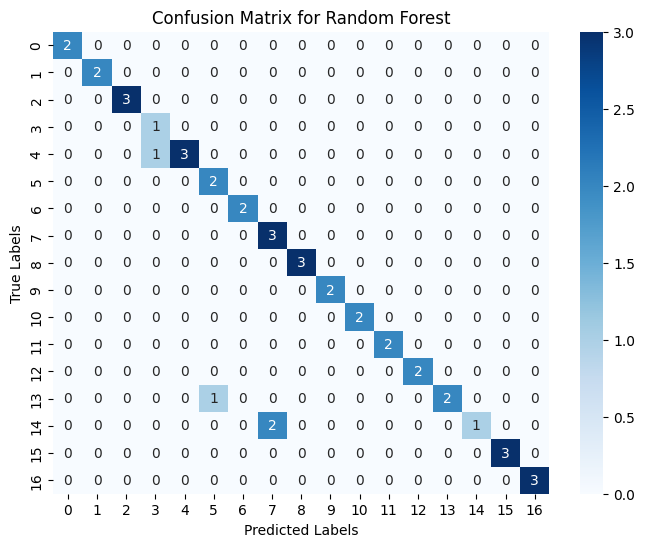

In [50]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Random Forest")
plt.show()

In [51]:
from sklearn.metrics import accuracy_score

y_train_pred = t.predict(x_train)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_pred_t)

print(f"Training Accuracy for Random Forest : {train_accuracy:.4f}")
print(f"Testing Accuracy for Random Forest: {test_accuracy:.4f}")


Training Accuracy for Random Forest : 0.9760
Testing Accuracy for Random Forest: 0.9048


In [52]:
y_train_pred = logreg_model.predict(x_train)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_pred_logreg)

print(f"Training Accuracy for logistic : {train_accuracy:.4f}")
print(f"Testing Accuracy for logistic: {test_accuracy:.4f}")


Training Accuracy for logistic : 0.9162
Testing Accuracy for logistic: 0.9048


In [53]:
#The logistic regression is the best choice between three models because it has the
#less ratio in overfitting between them,(Logistic is simpler model than random forest)

In [54]:
report = classification_report(y_test, y_pred_t, output_dict=True)
report_df = pd.DataFrame(report).transpose()

In [55]:
report_df # Random forest report

,precision,recall,f1-score,support
0,1.000000,1.000000,1.000000,2.000000
1,1.000000,1.000000,1.000000,2.000000
3,1.000000,1.000000,1.000000,3.000000
5,0.500000,1.000000,0.666667,1.000000
6,1.000000,0.750000,0.857143,4.000000
7,0.666667,1.000000,0.800000,2.000000
8,1.000000,1.000000,1.000000,2.000000
9,0.600000,1.000000,0.750000,3.000000
10,1.000000,1.000000,1.000000,3.000000
11,1.000000,1.000000,1.000000,2.000000


In [56]:
report_2 = classification_report(y_test, y_pred_logreg, output_dict=True)
report_df2 = pd.DataFrame(report_2).transpose()
report_df2 # Logistic Regression report

,precision,recall,f1-score,support
0,1.000000,1.000000,1.000000,2.000000
1,1.000000,1.000000,1.000000,2.000000
3,1.000000,1.000000,1.000000,3.000000
5,0.500000,1.000000,0.666667,1.000000
6,1.000000,0.750000,0.857143,4.000000
7,0.666667,1.000000,0.800000,2.000000
8,1.000000,1.000000,1.000000,2.000000
9,0.600000,1.000000,0.750000,3.000000
10,1.000000,1.000000,1.000000,3.000000
11,1.000000,1.000000,1.000000,2.000000
